Saving sparsh1.csv to sparsh1 (3).csv
Saving sparsh2.csv to sparsh2 (3).csv
Saving sparsh3.csv to sparsh3 (3).csv
[448223 448072 447815 ... 451195 451152 451161]


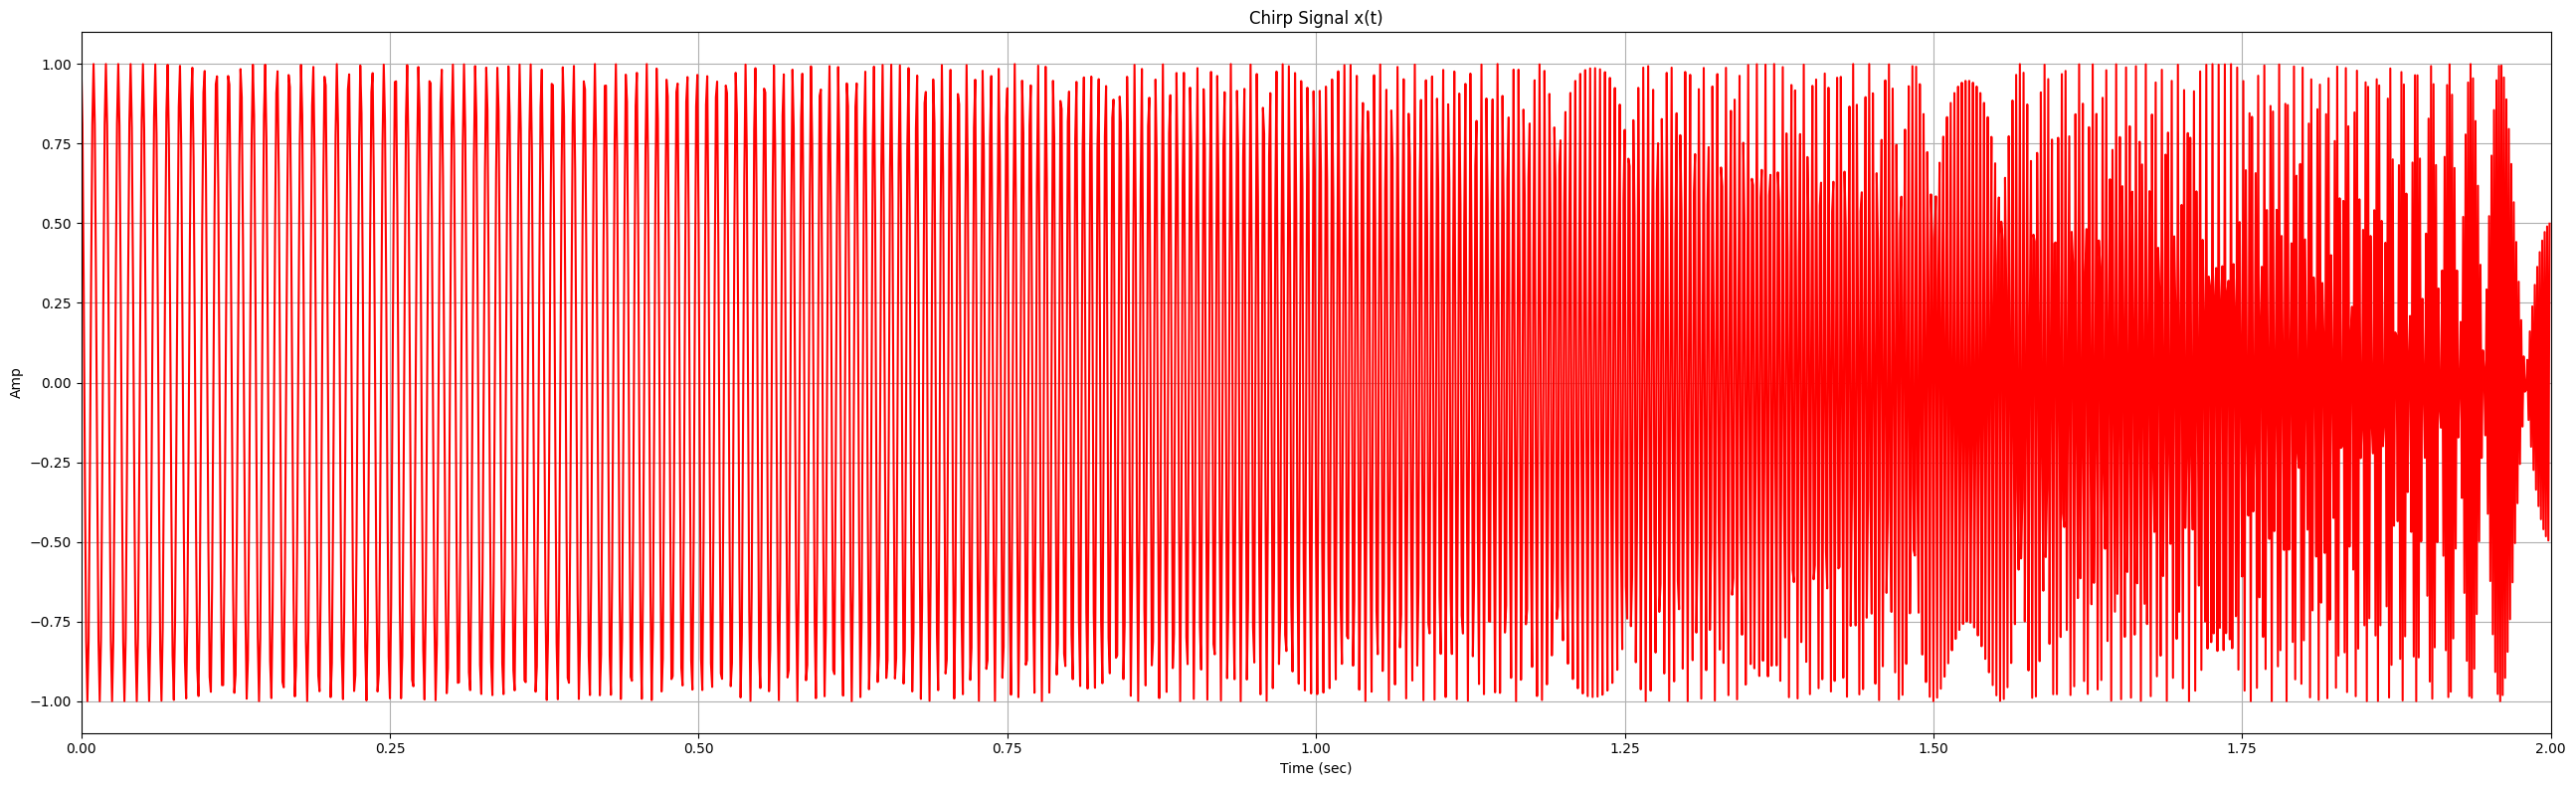

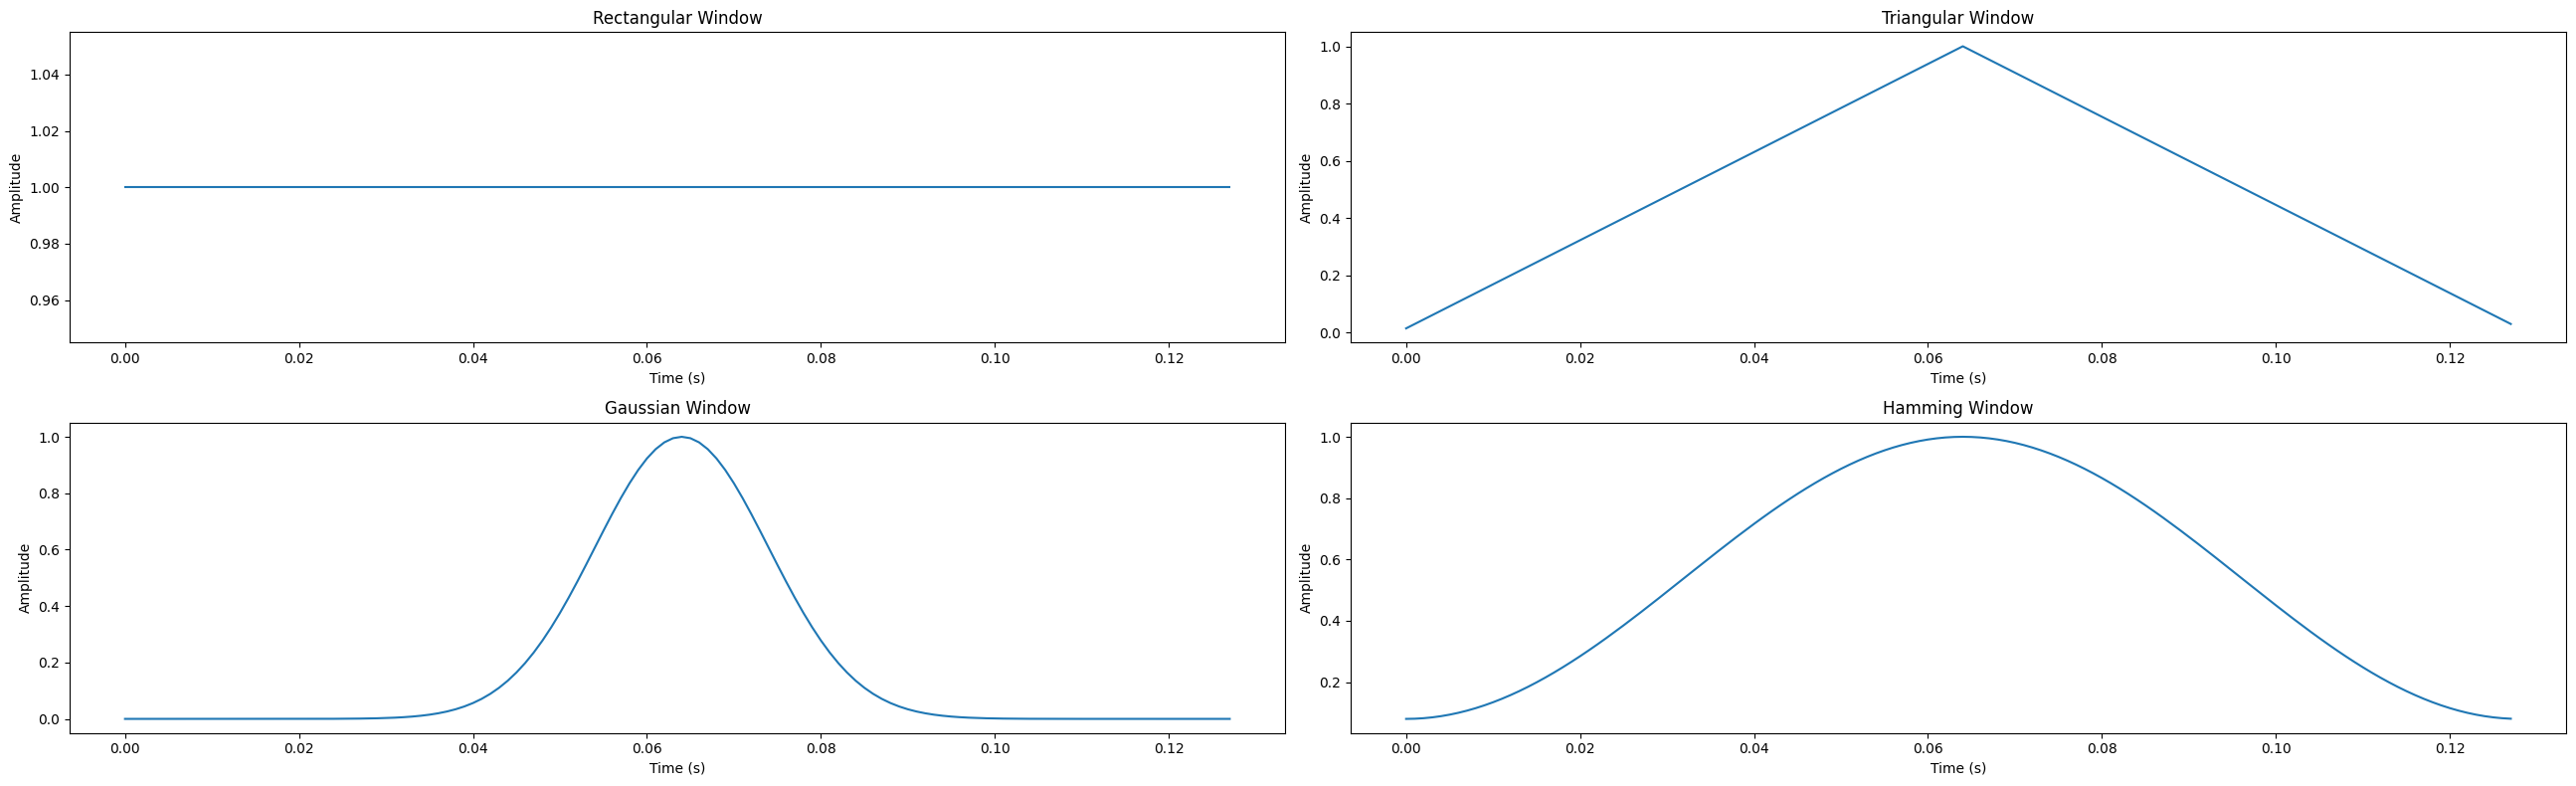

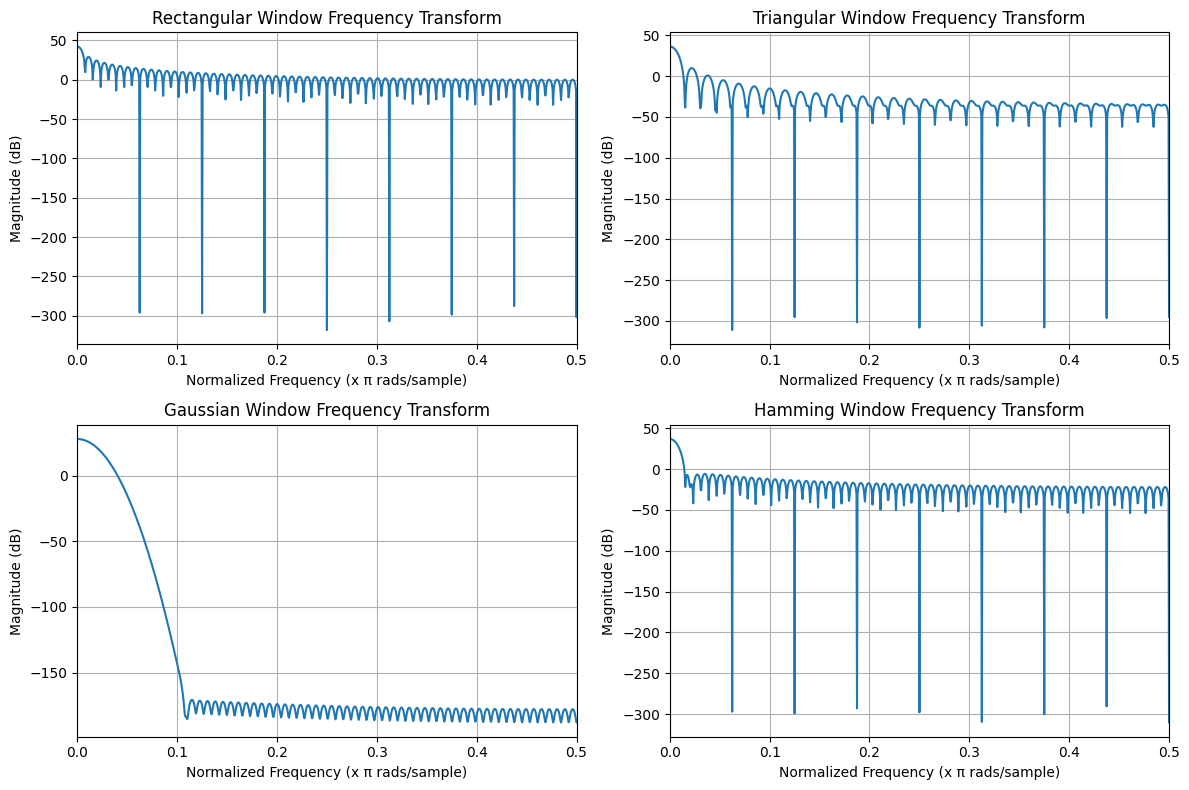

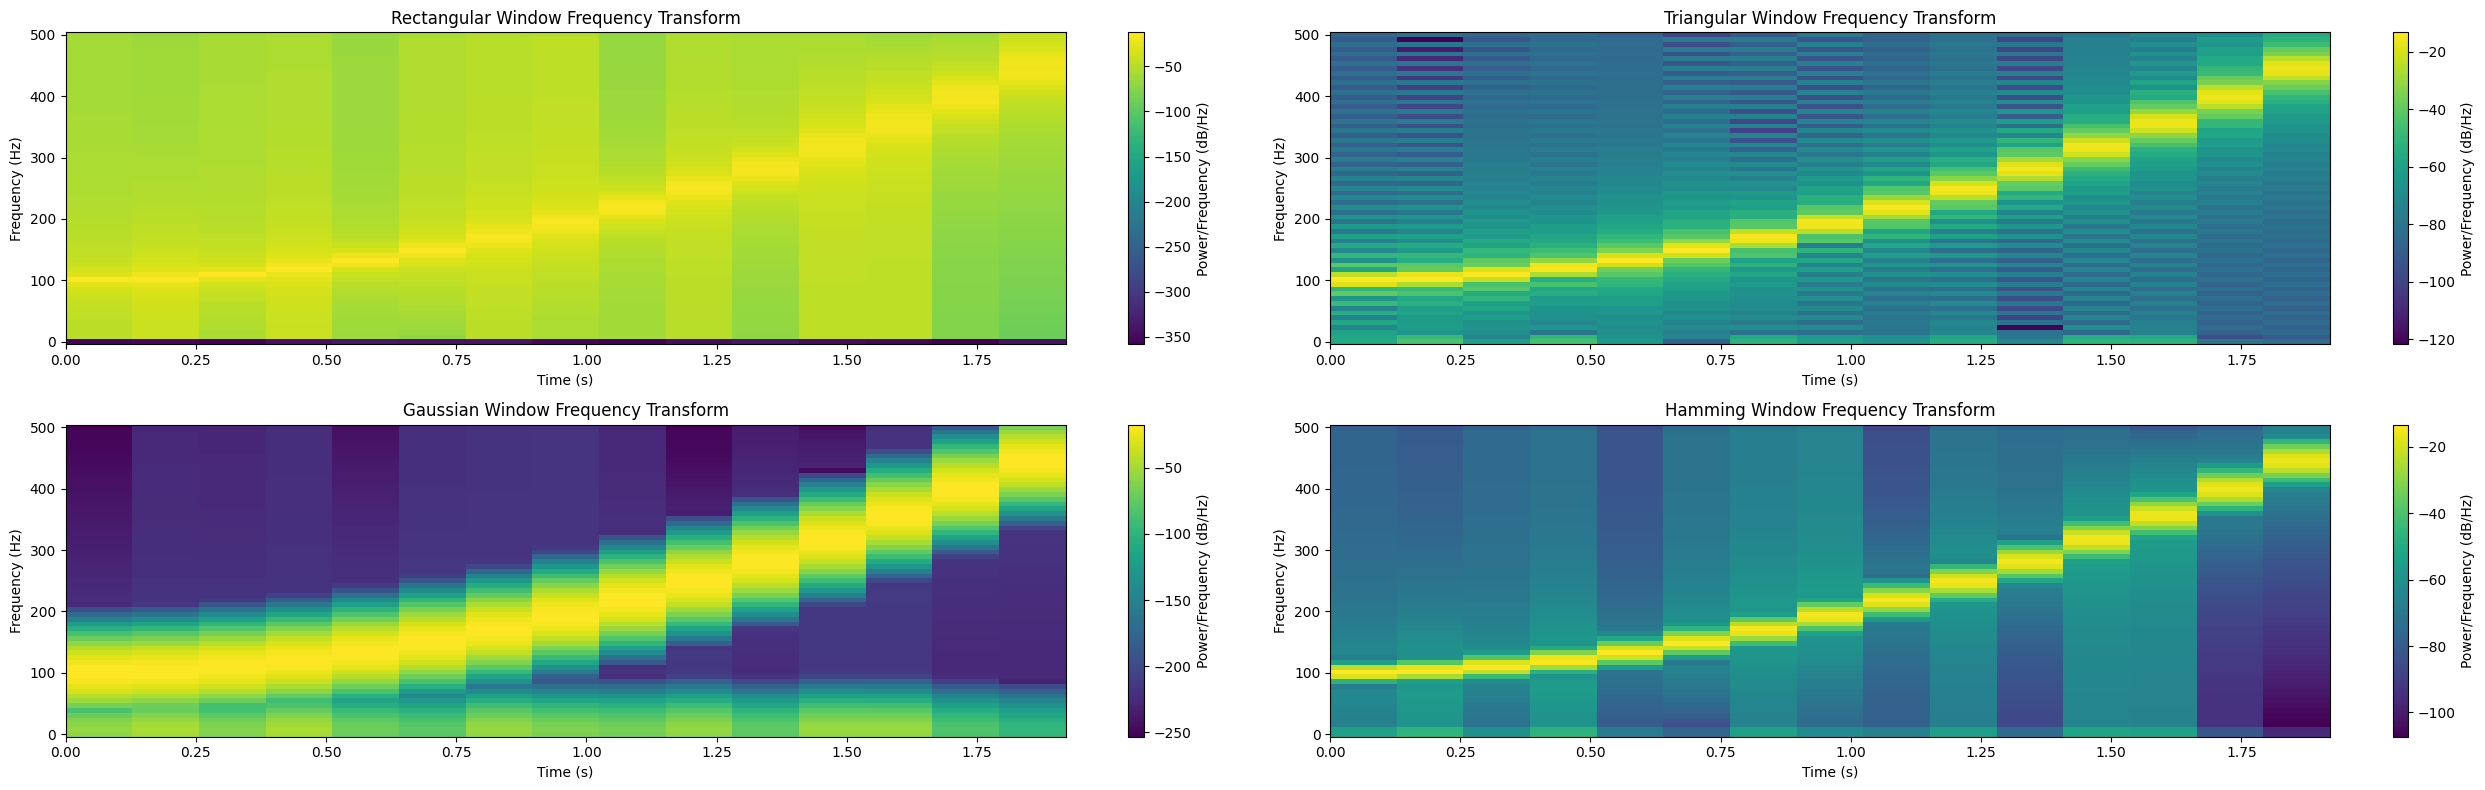

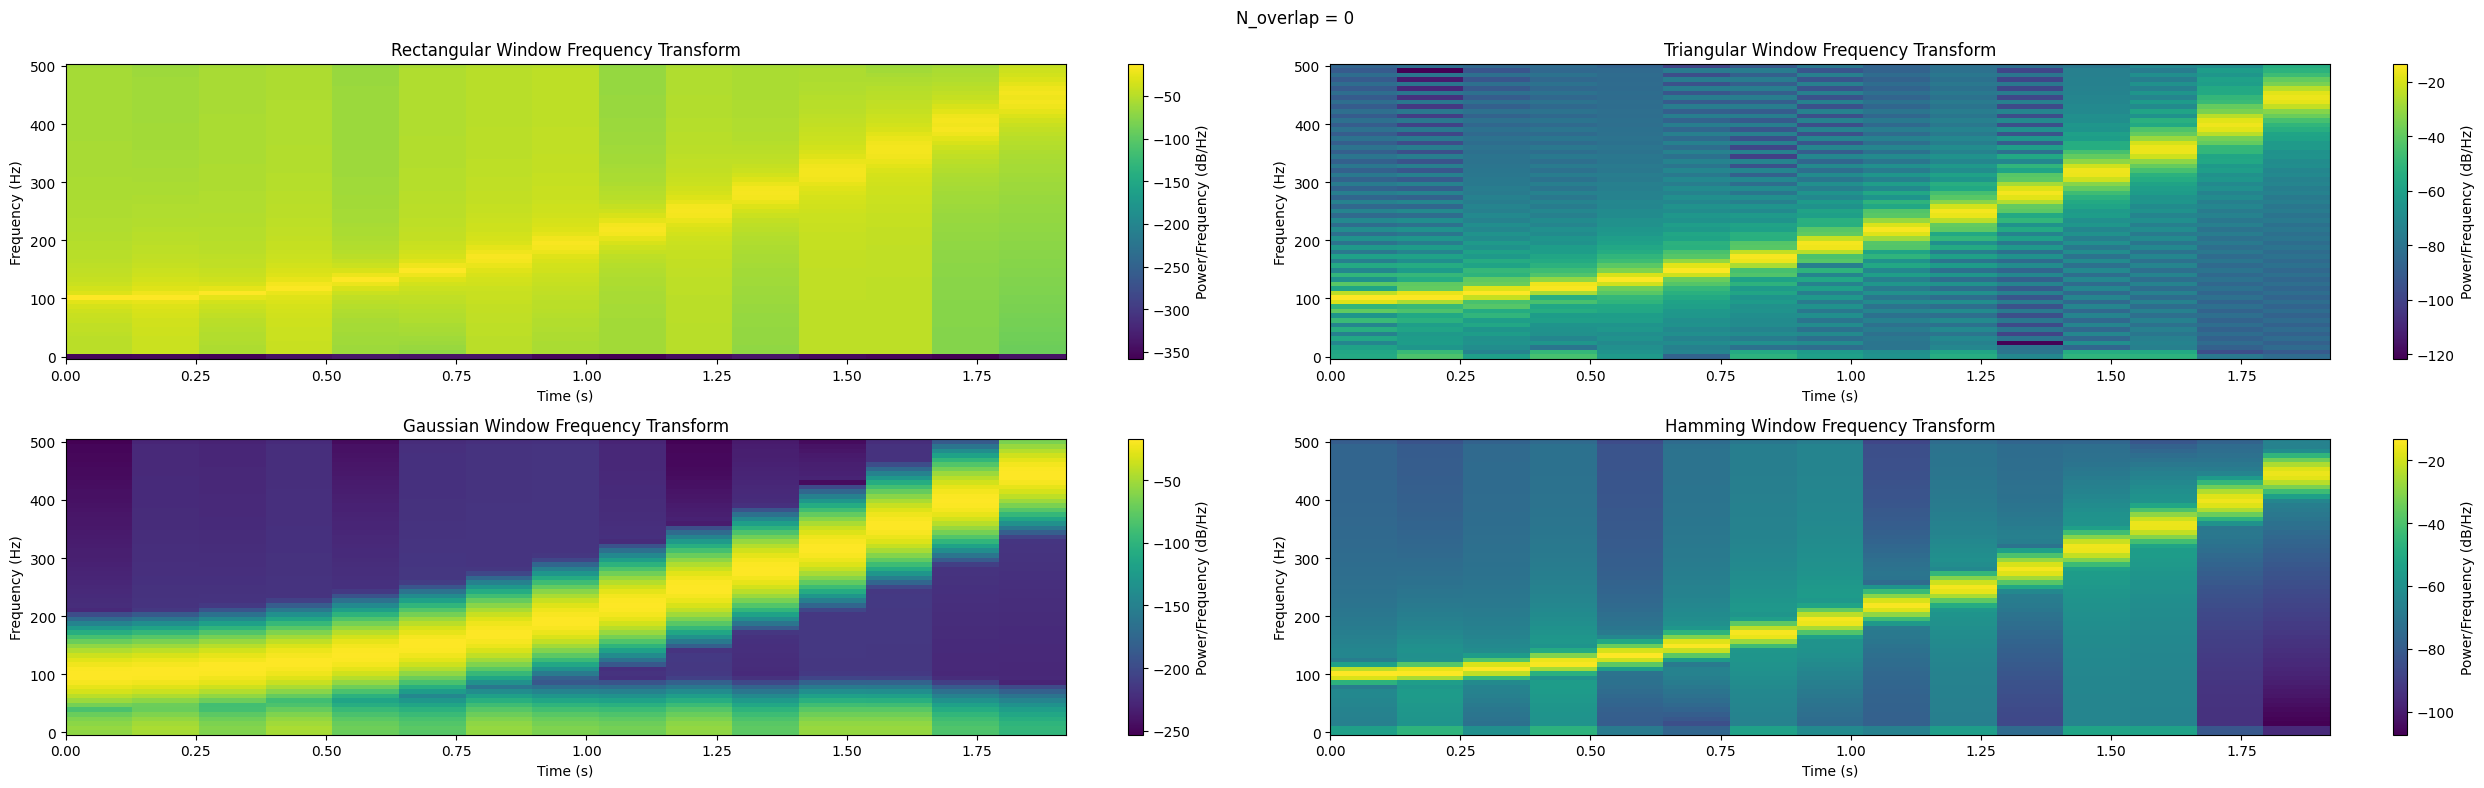

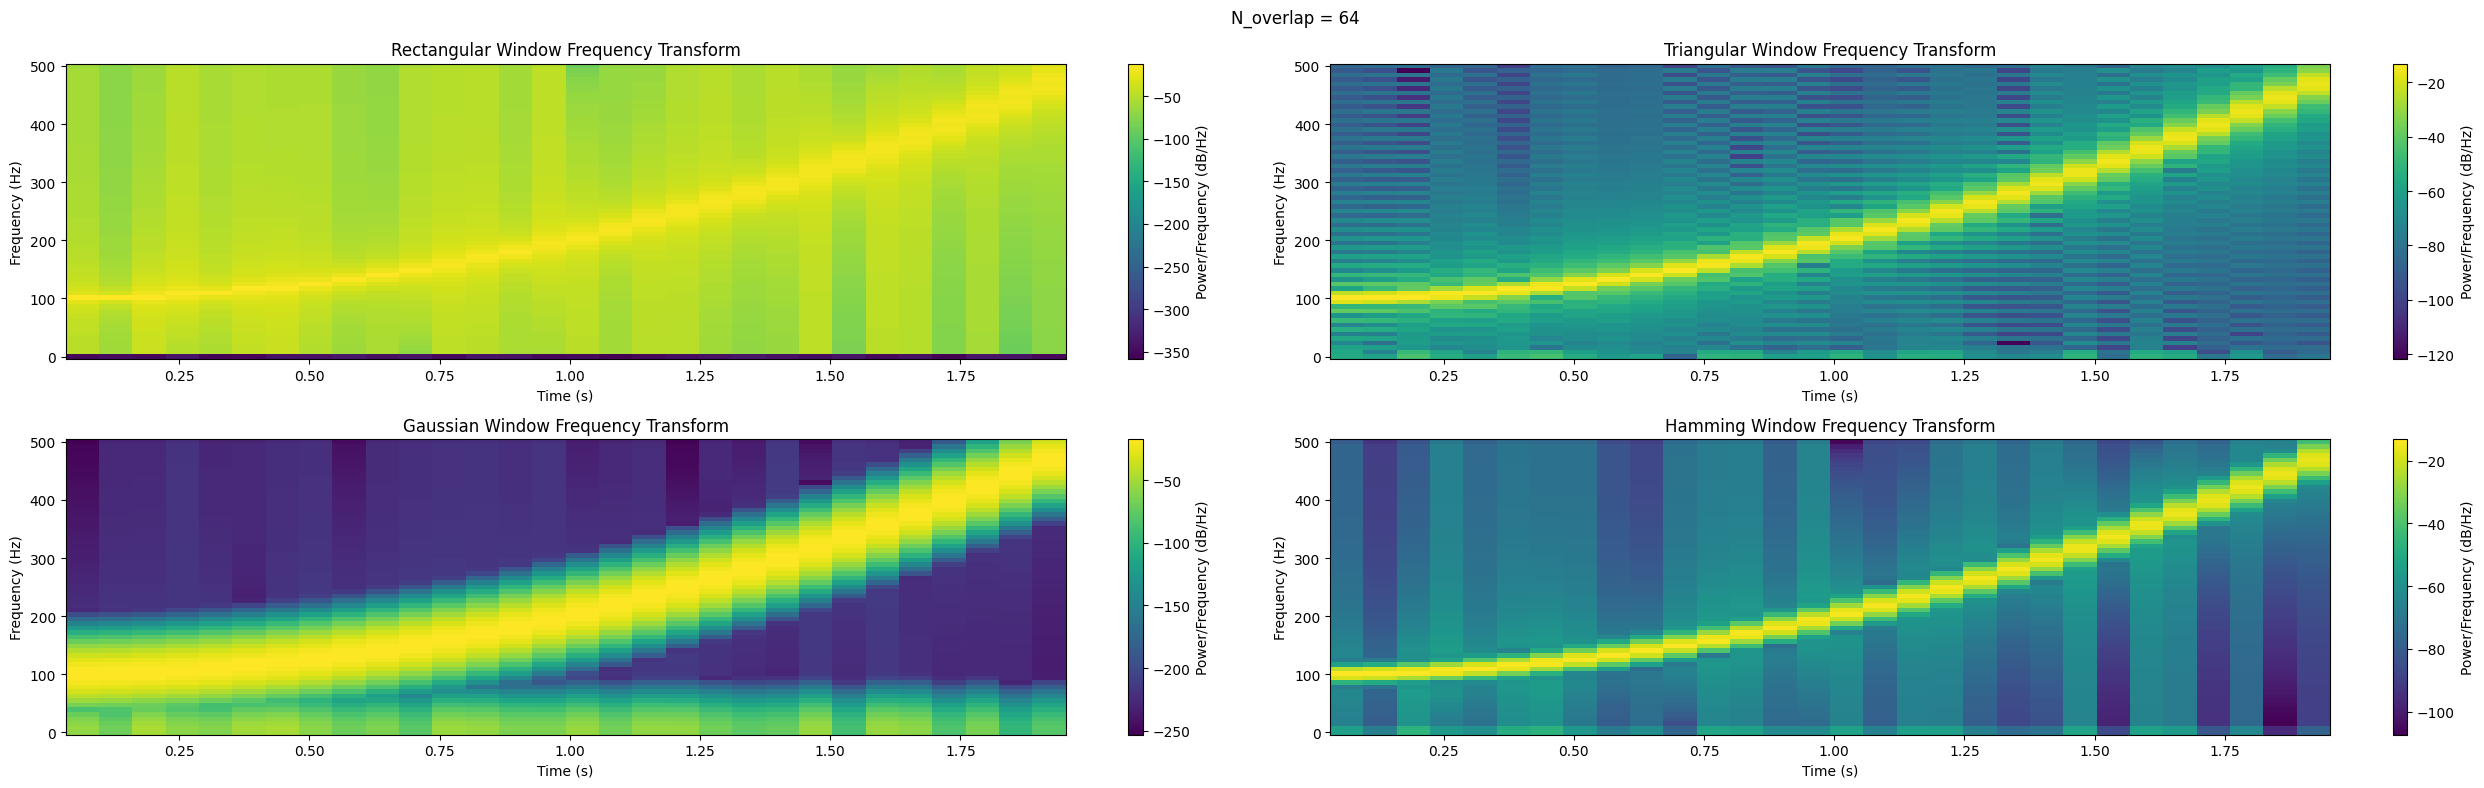

<ipython-input-6-58fe719aeebb>:187: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


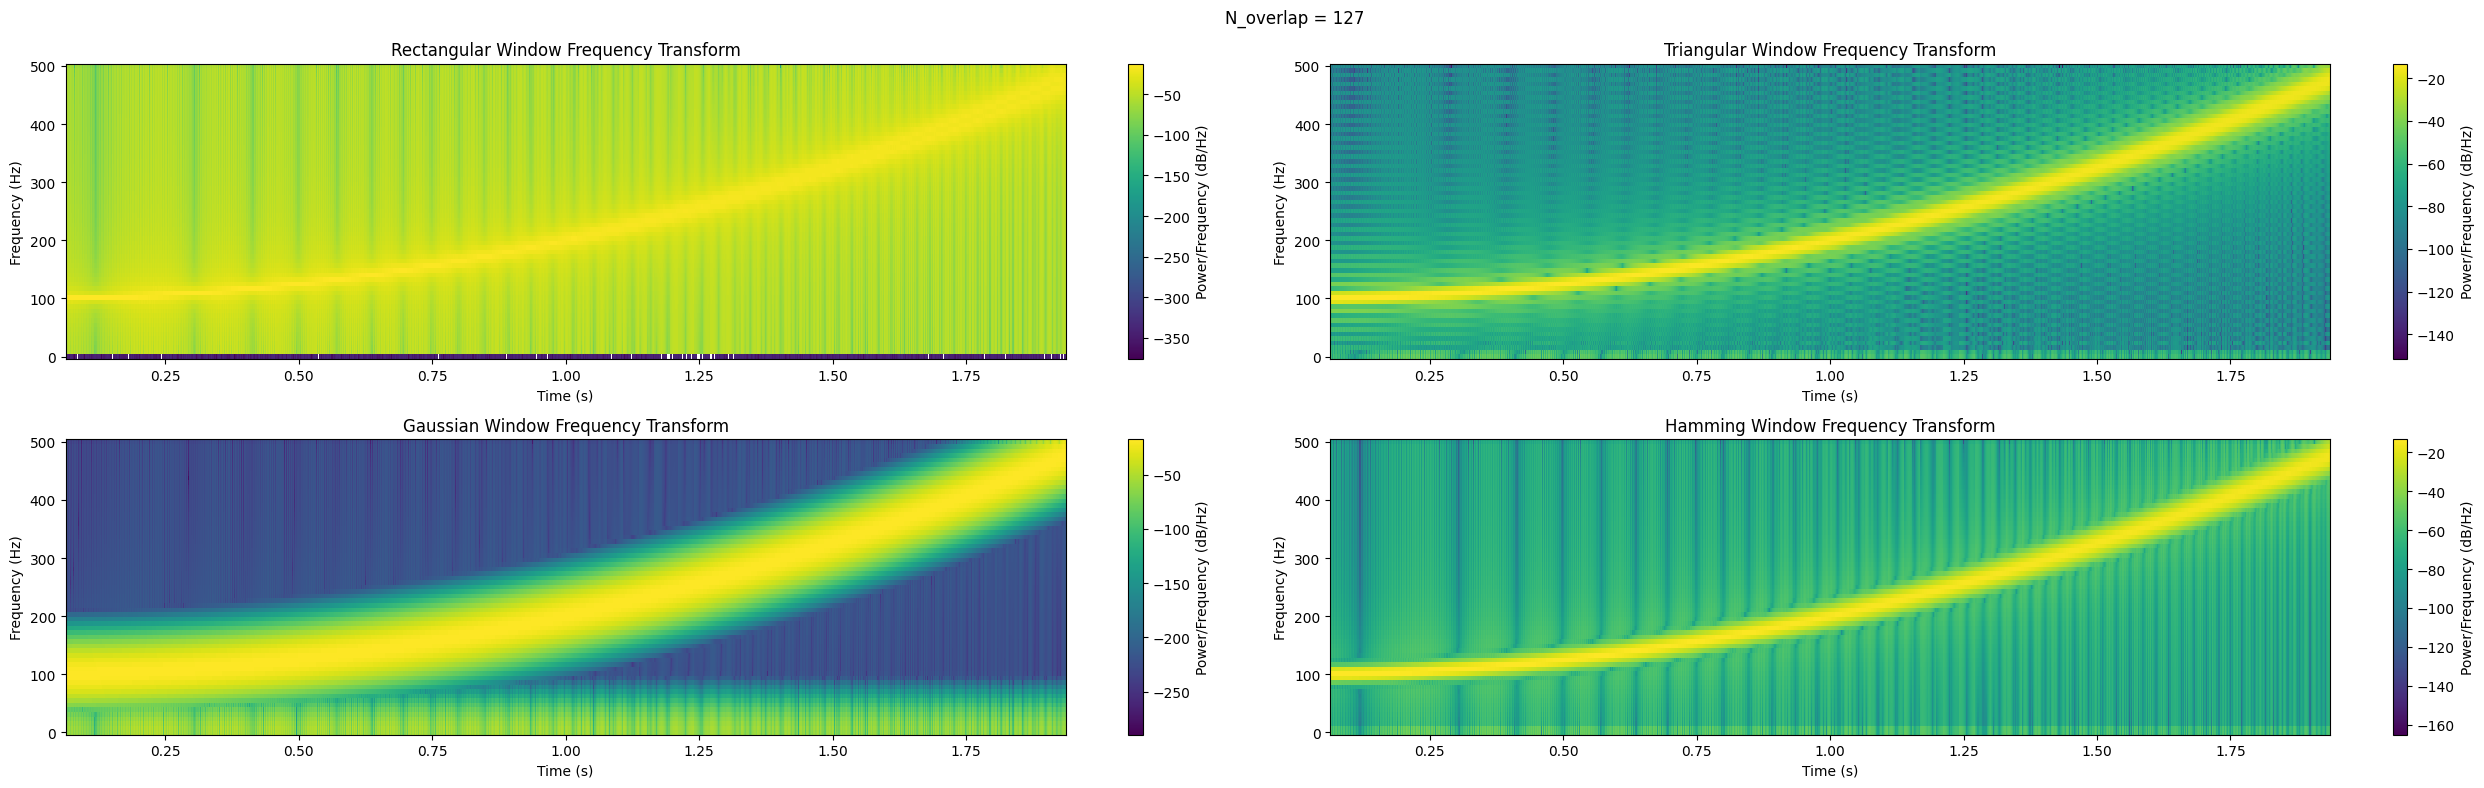

<ipython-input-6-58fe719aeebb>:236: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


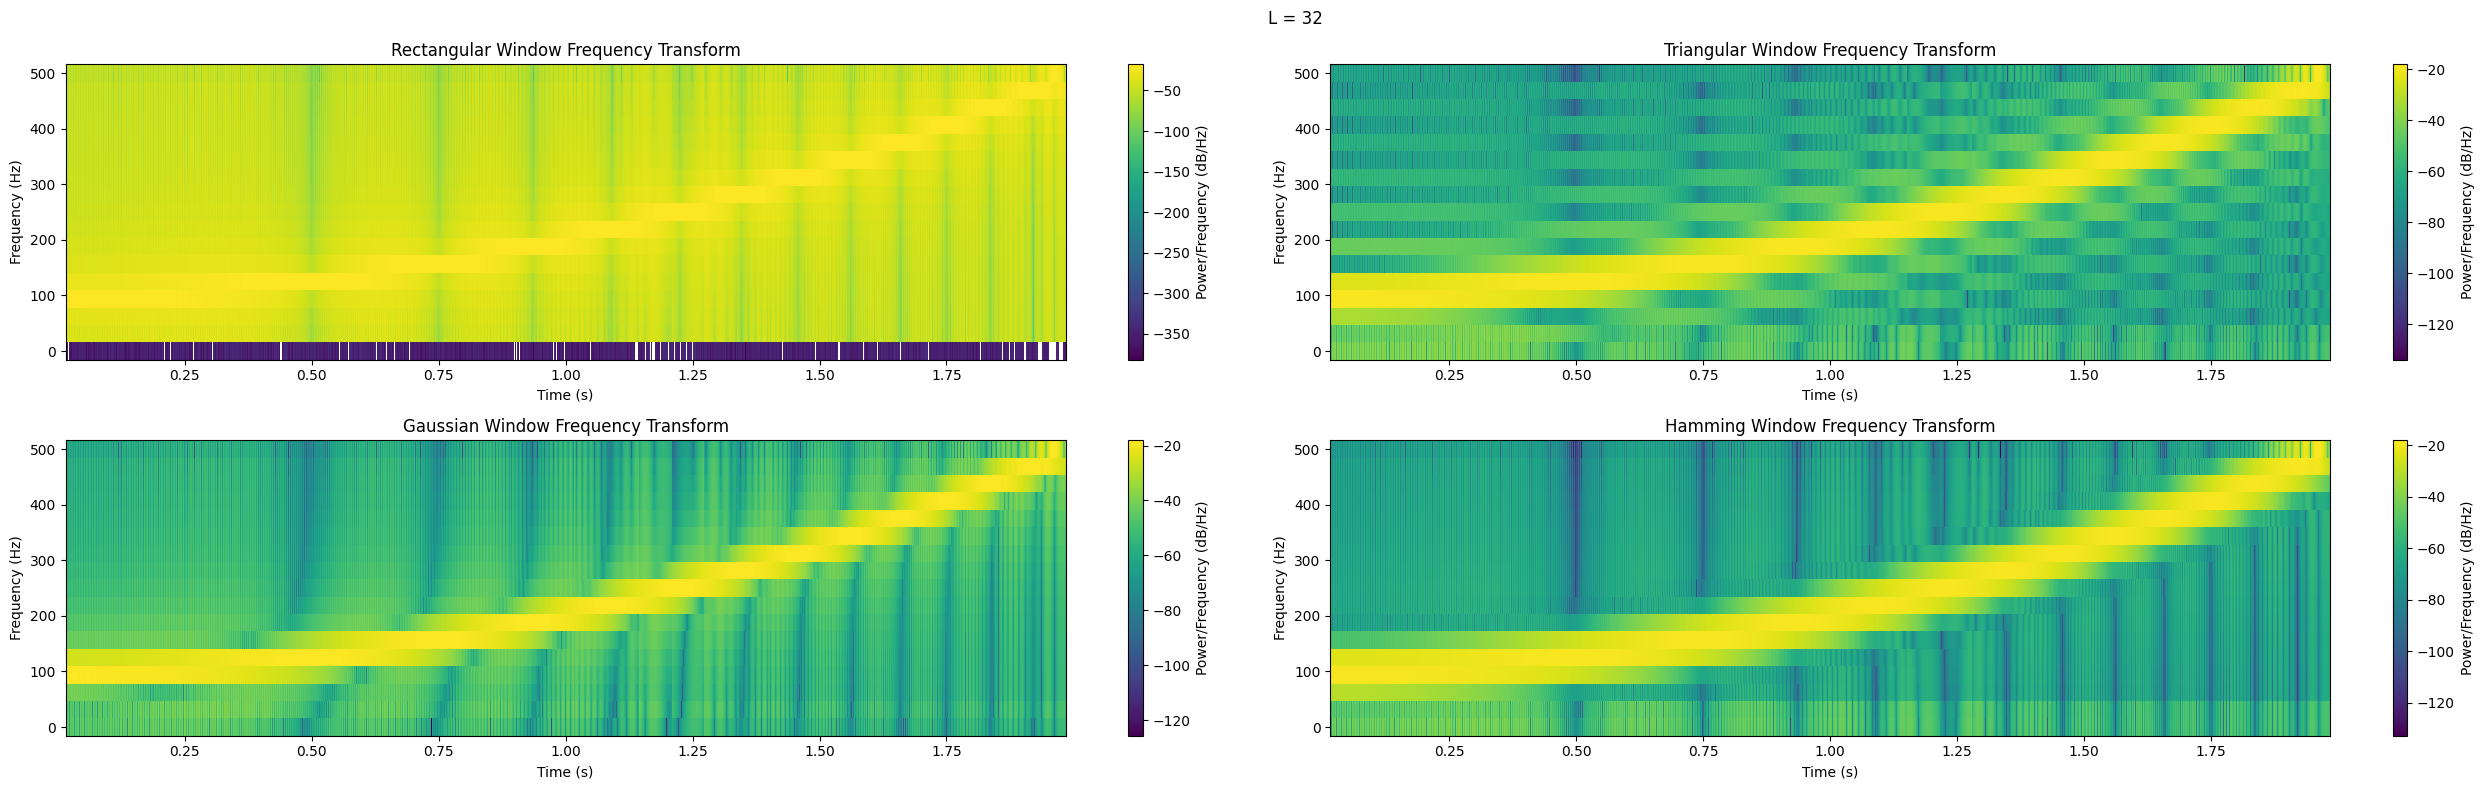

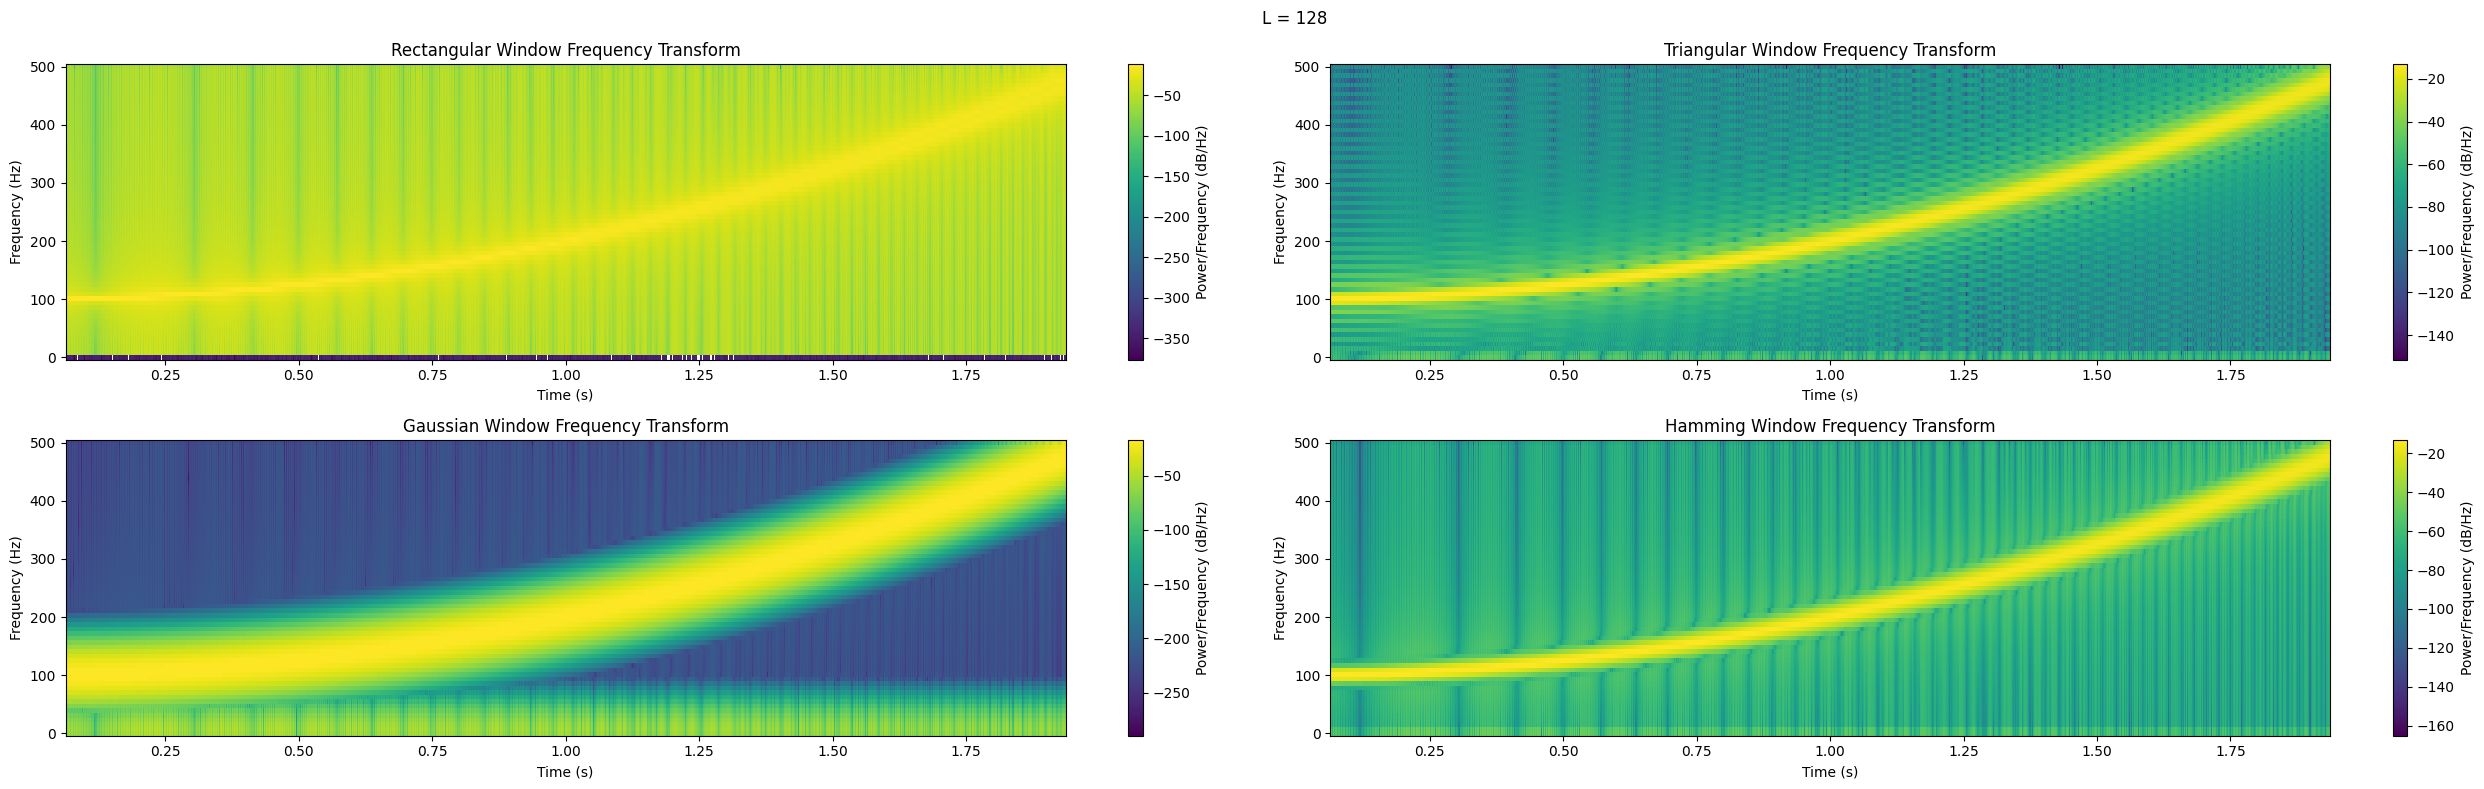

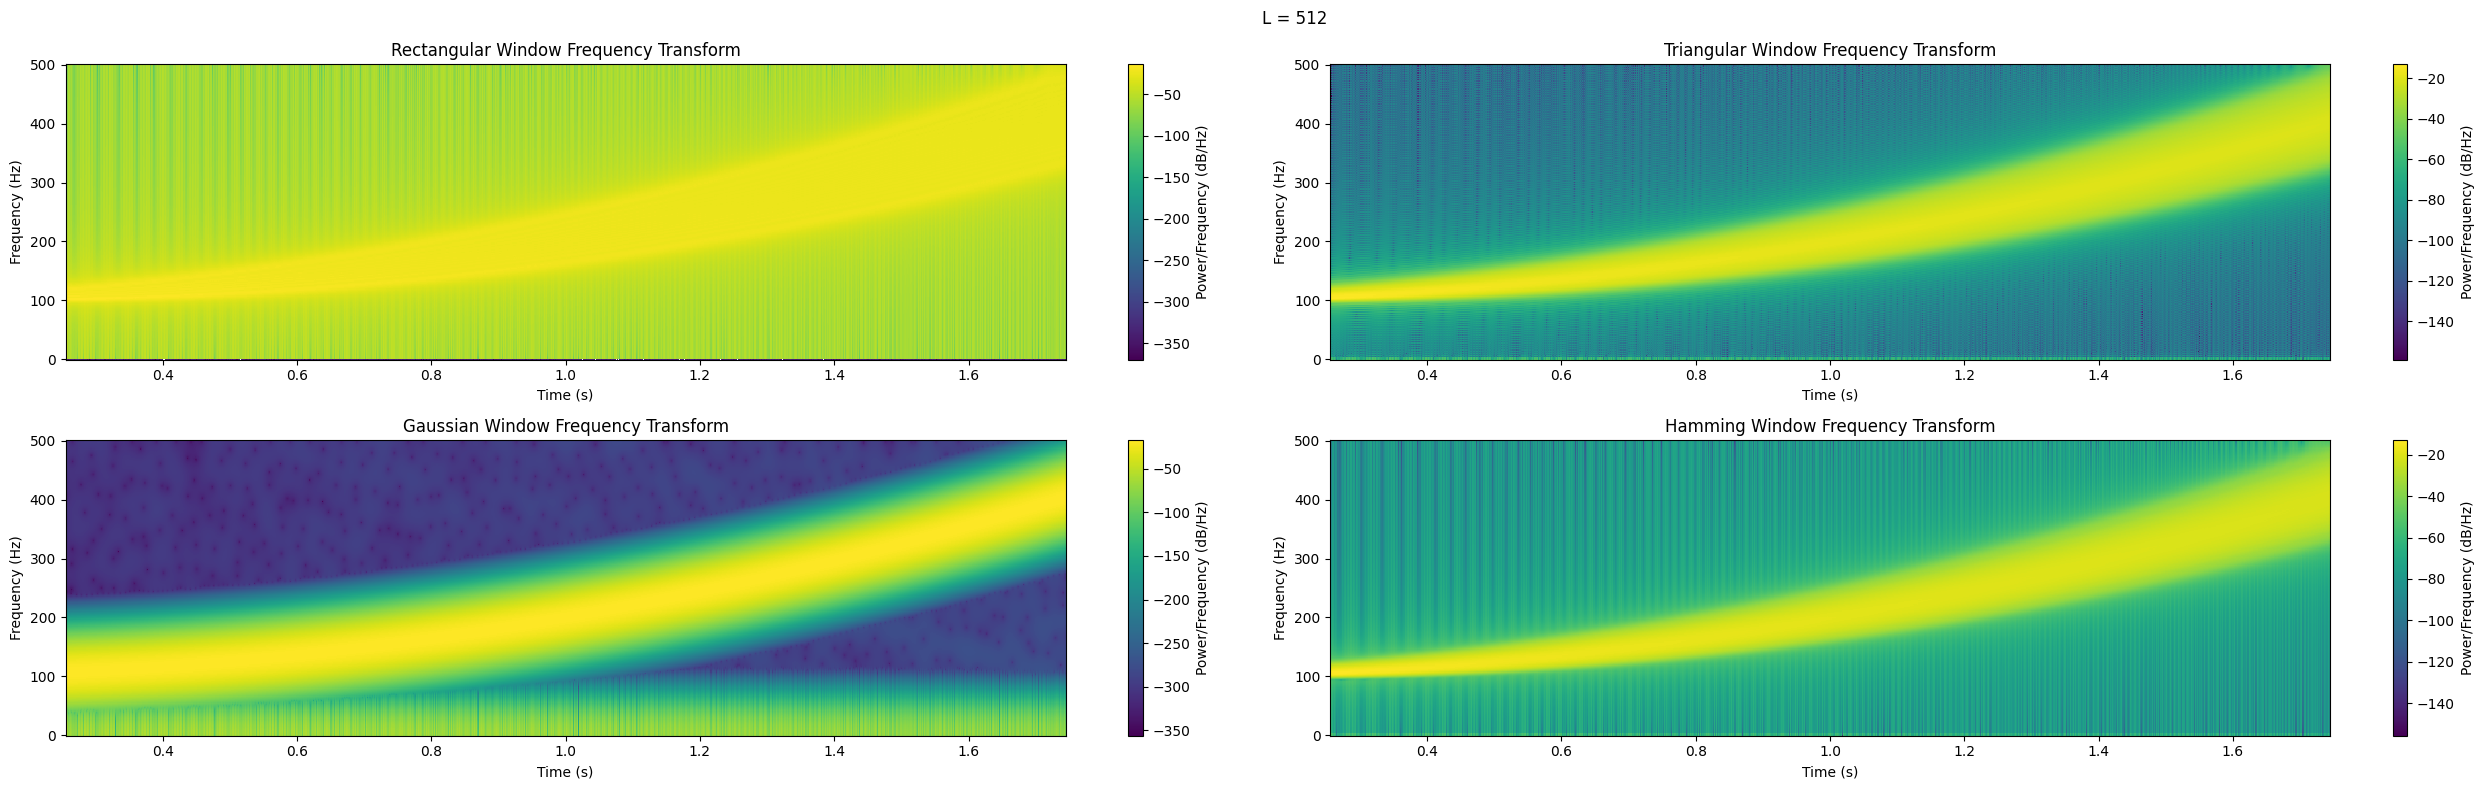

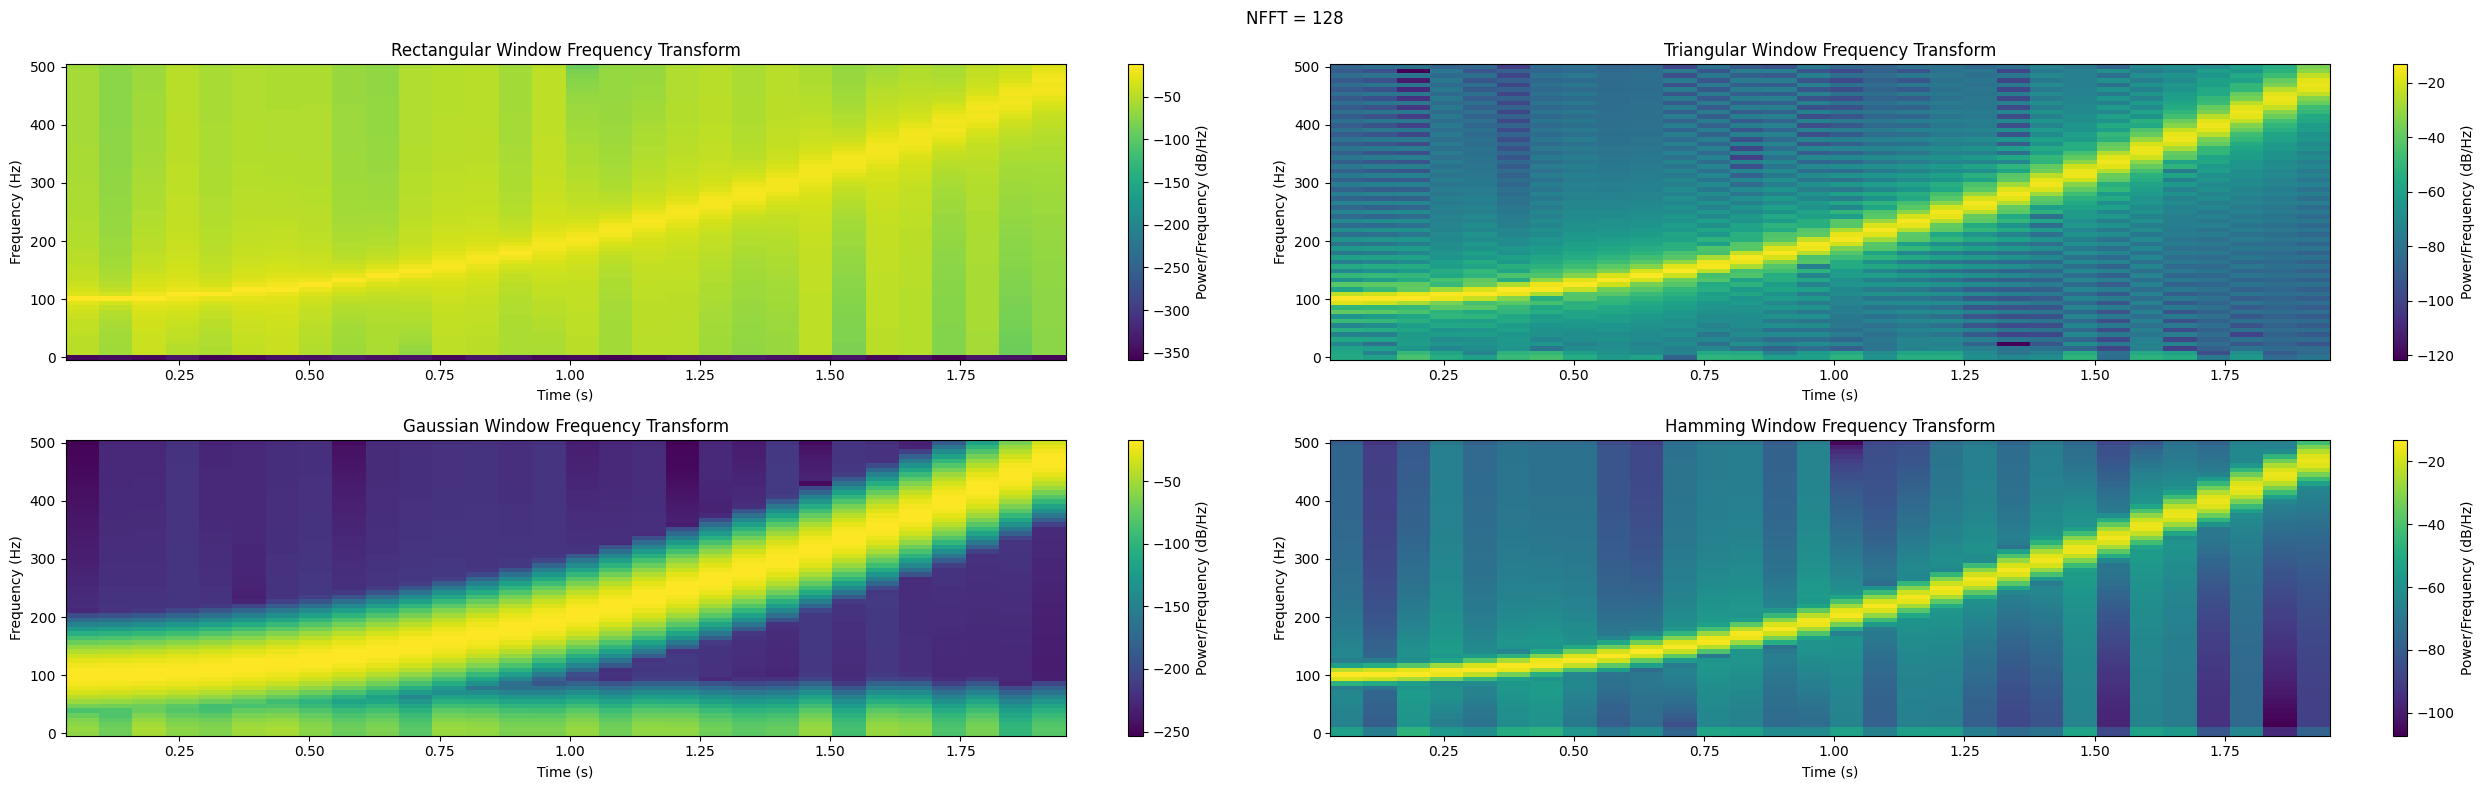

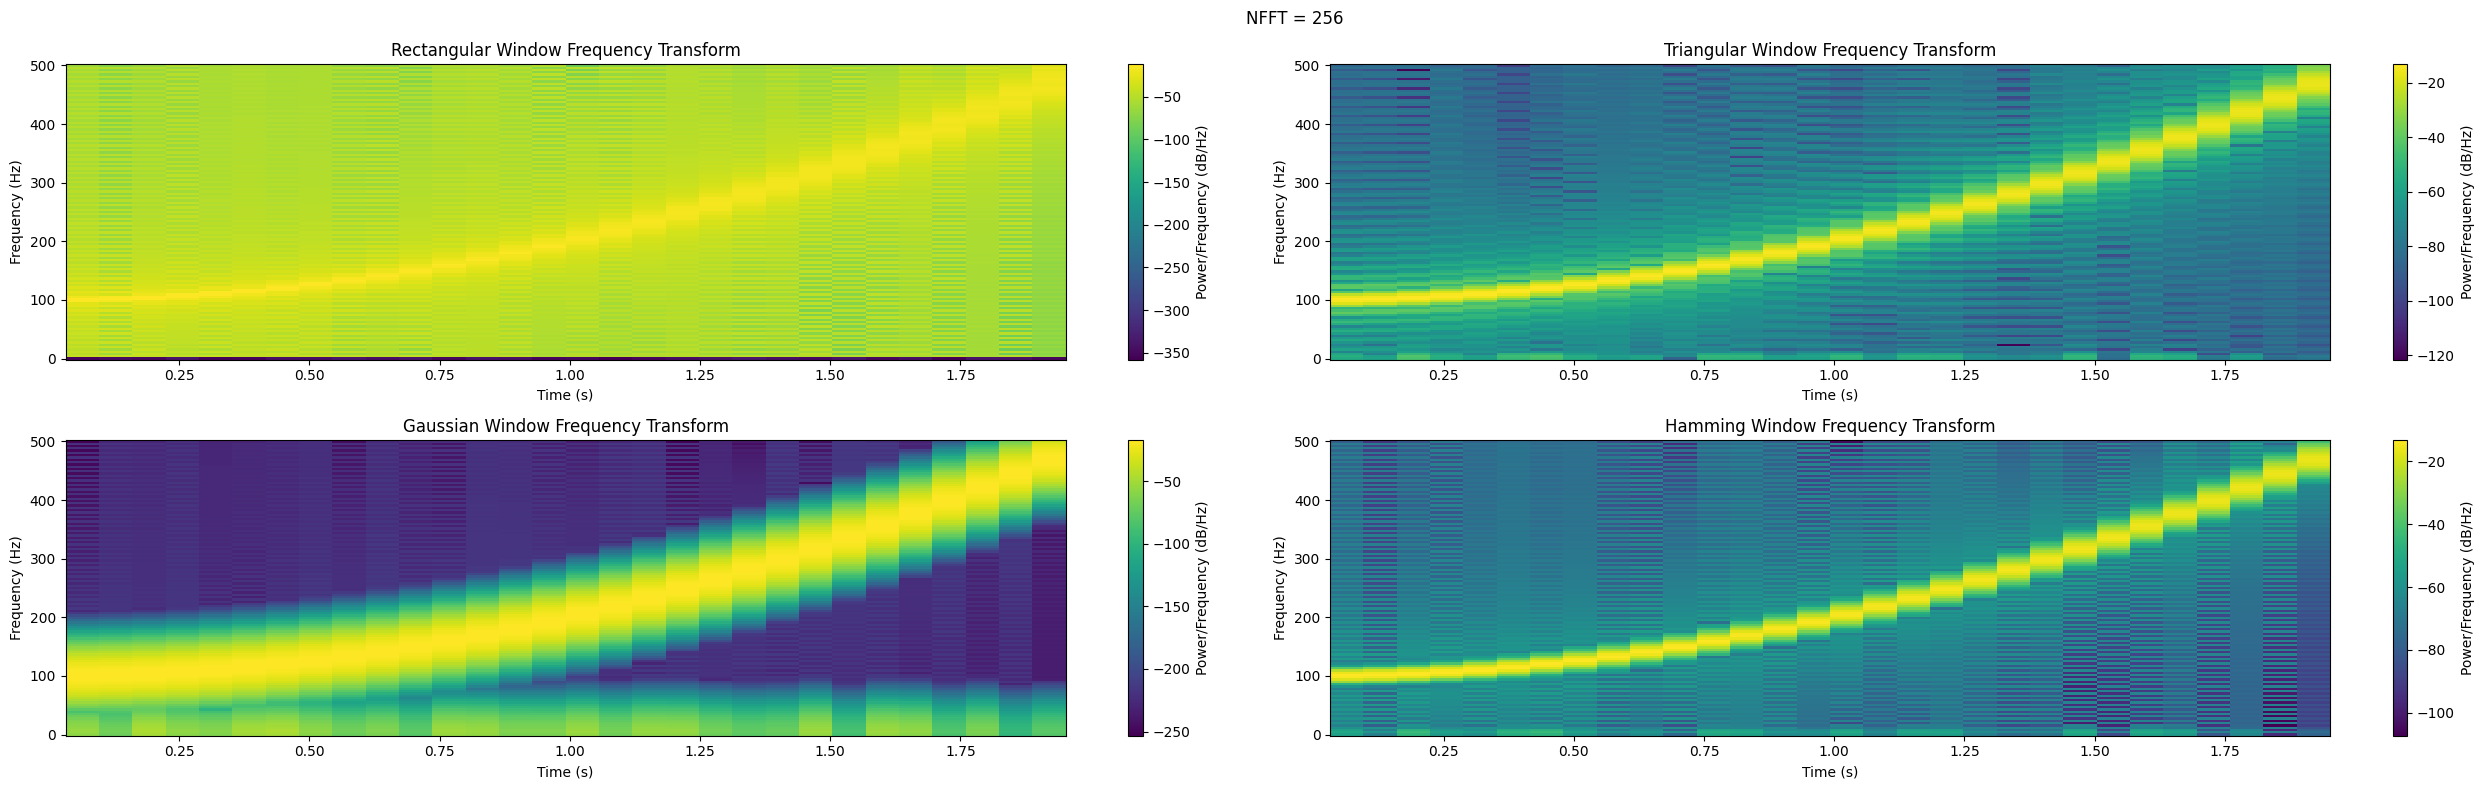

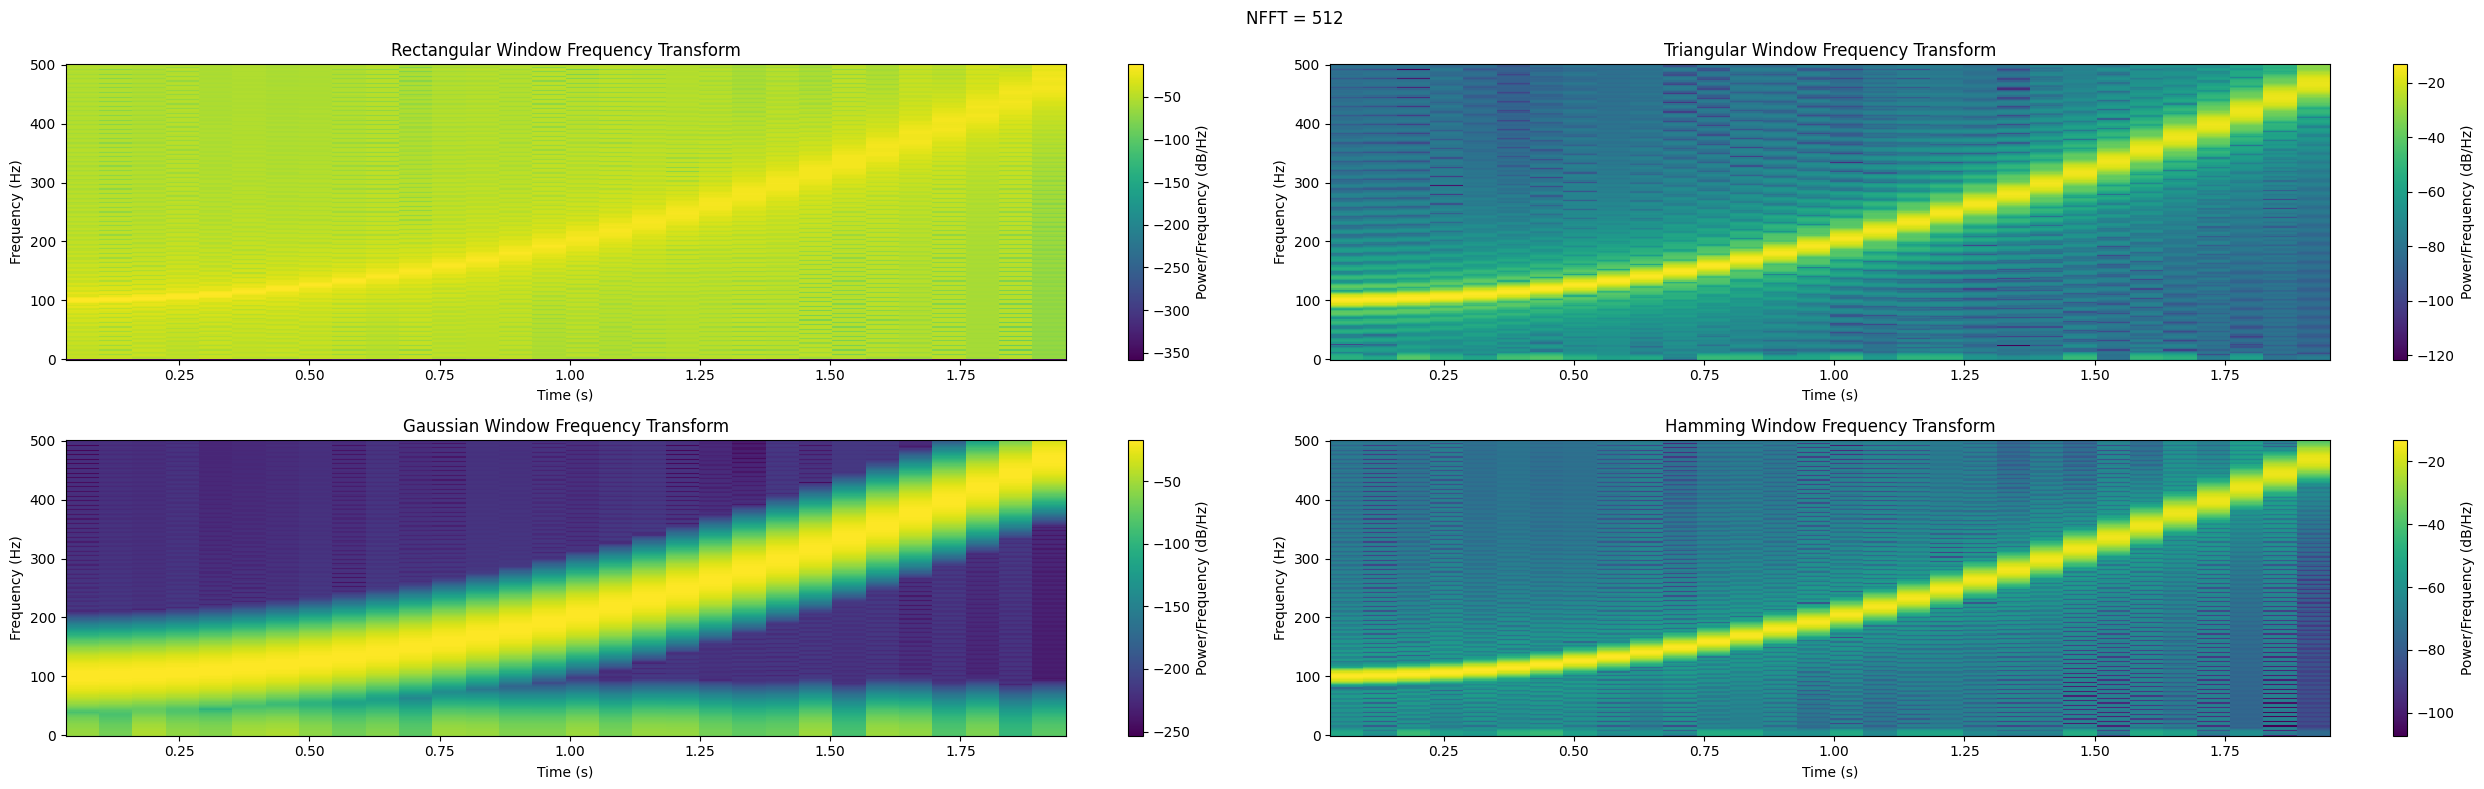

In [6]:

# Upload the CSV file
from google.colab import files
uploaded = files.upload()
import numpy as np

# Import pandas to read the CSV file
import pandas as pd

# Load the CSV file into a DataFrame

df1=pd.read_csv("/content/sparsh1.csv")
df2=pd.read_csv("/content/sparsh2.csv")
df3=pd.read_csv("/content/sparsh3.csv")
start_markers=["start zero.png","start one.png","start two.jpg","start three.jpg","start four.jpg","start five.jpg","start six.jpg","start seven.jpg","start eight.jpg","start nine.jpg","start six.jpg"]
end_markers=["end zero.png","end one.png","end two.jpg","end three.jpg","end four.jpg","end five.jpg","end six.jpg","end seven.jpg","end eight.jpg","end nine.jpg"]

s=np.zeros((3,10))
e=np.zeros((3,10))
for j in range(10):
  for i in range(21525):
    if(df1["435764"].loc[i]==start_markers[j]):
      s[0][j]=i
      continue
    if(df1["435764"].loc[i]==end_markers[j]):
      e[0][j]=i
      break
  for i in range(21397):
    if(df2["101749"].loc[i]==start_markers[j]):
      s[1][j]=i
      continue
    if(df2["101749"].loc[i]==end_markers[j]):
      e[1][j]=i
      break
  for i in range(22165):
    if(df3["252989"].loc[i]==start_markers[j]):
      s[2][j]=i
      continue
    if(df3["252989"].loc[i]==end_markers[j]):
      e[2][j]=i
      break
signal0=df1["435764"].loc[(s[0][0]+1):e[0][0]-1].to_numpy().astype(int)
print(signal0)


##1
##a
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, get_window, spectrogram

T = 2.0  # sec
fs = 1000  # Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz
beta = 100
f_t = f0 + beta * t**2

x_t = chirp(t, f0=f0, f1=500, t1=T, method='quadratic')
x_t2= np.cos(2 * np.pi * f_t * t)

plt.figure(figsize=(26, 8))
plt.plot(t, x_t, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

 ##b
L = 128
fs = 1000  # Hz
std = 10 # for gaussian

rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

def normalized_frequency_axis(N):
    return np.arange(N) / N

N = len(x_t)
plt.figure(figsize=(12, 8))
cnt = 1
names = ["Rectangular", "Triangular", "Gaussian", "Hamming"]
for i in [rectangular_window, triangular_window, gauss_window, hamming_window]:
    X = np.fft.fft(i, N)
    X_mag = np.abs(X)

    X_dB = 20 * np.log10(X_mag)

    freq_axis = normalized_frequency_axis(N)

    plt.subplot(2, 2, cnt)
    plt.plot(freq_axis, X_dB)
    plt.title('{} Window Frequency Transform'.format(names[cnt-1]))
    plt.xlabel('Normalized Frequency (x π rads/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim([0, freq_axis[1000]])
    cnt += 1

plt.tight_layout()
plt.show()
##c

noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()

##d

noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()

##e

Ls = [32, 128, 512]

for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()

##f
L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L/2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()



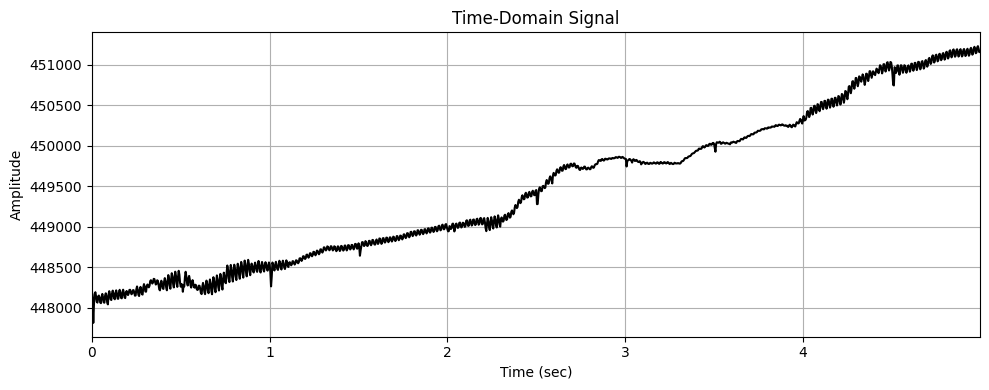

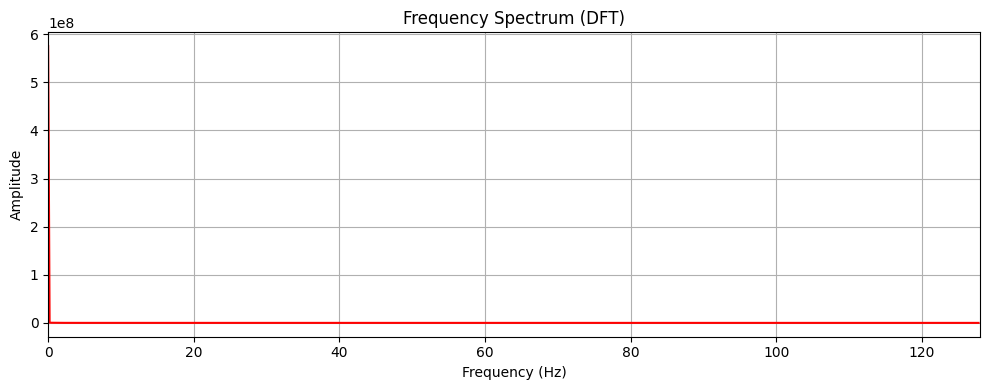

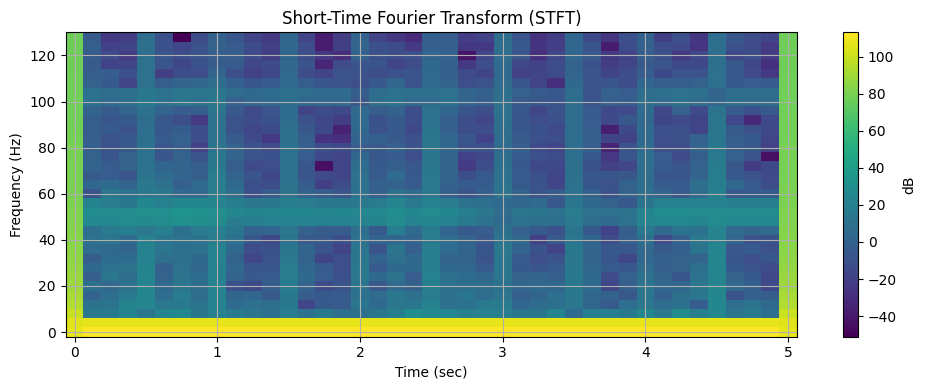

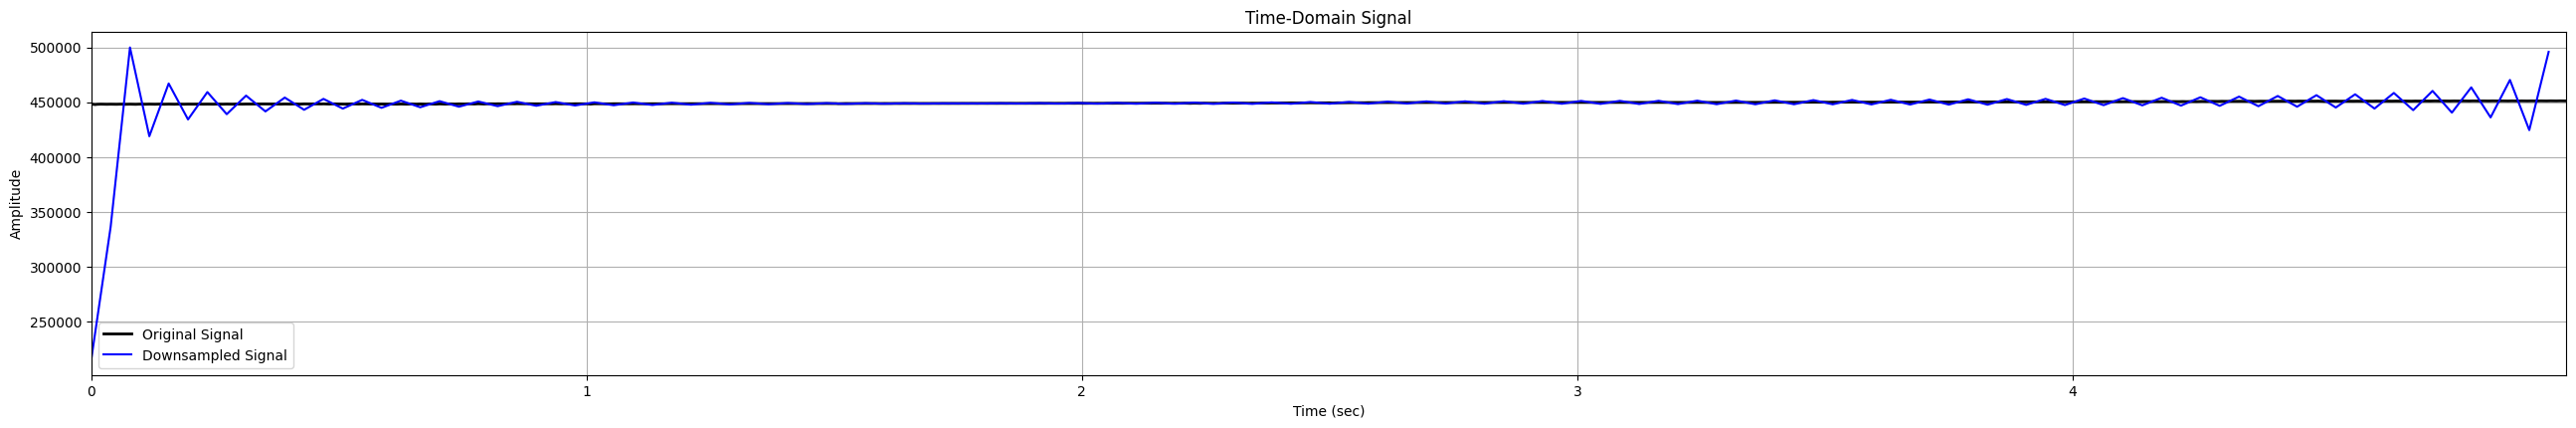

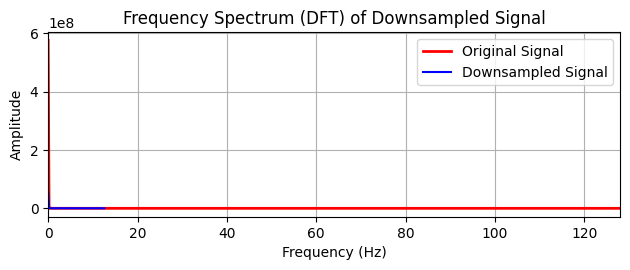

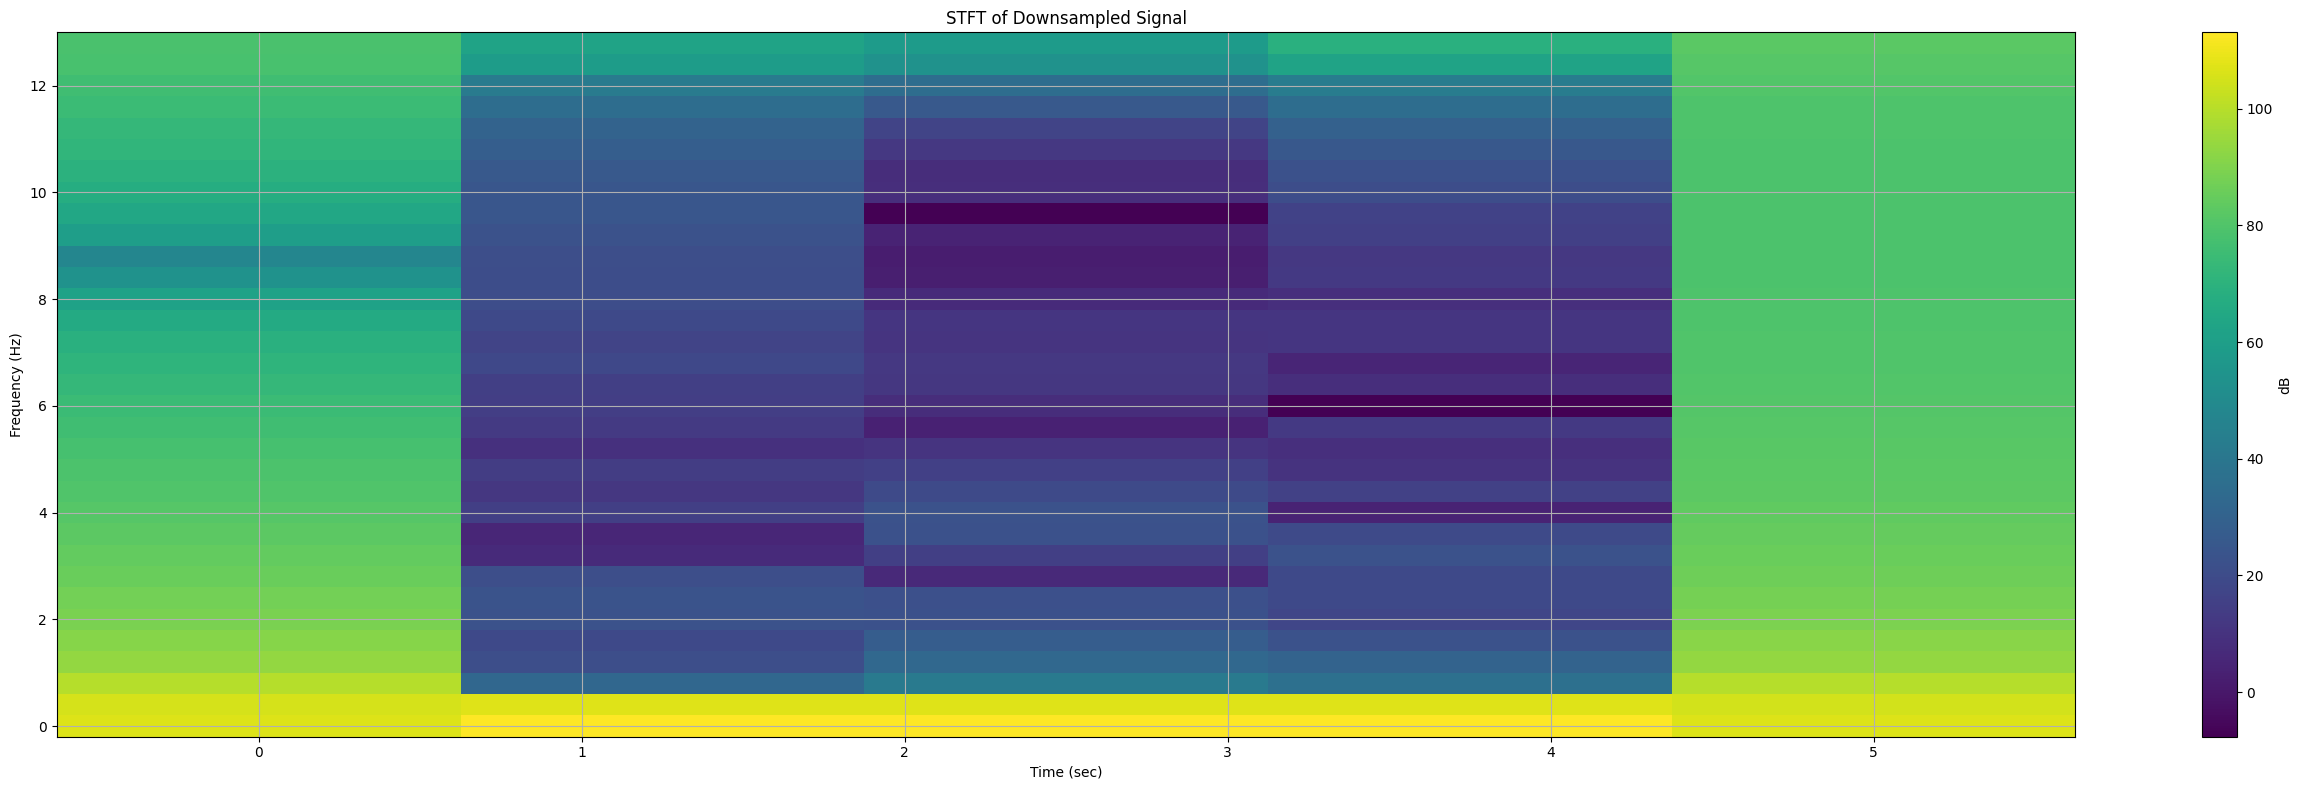

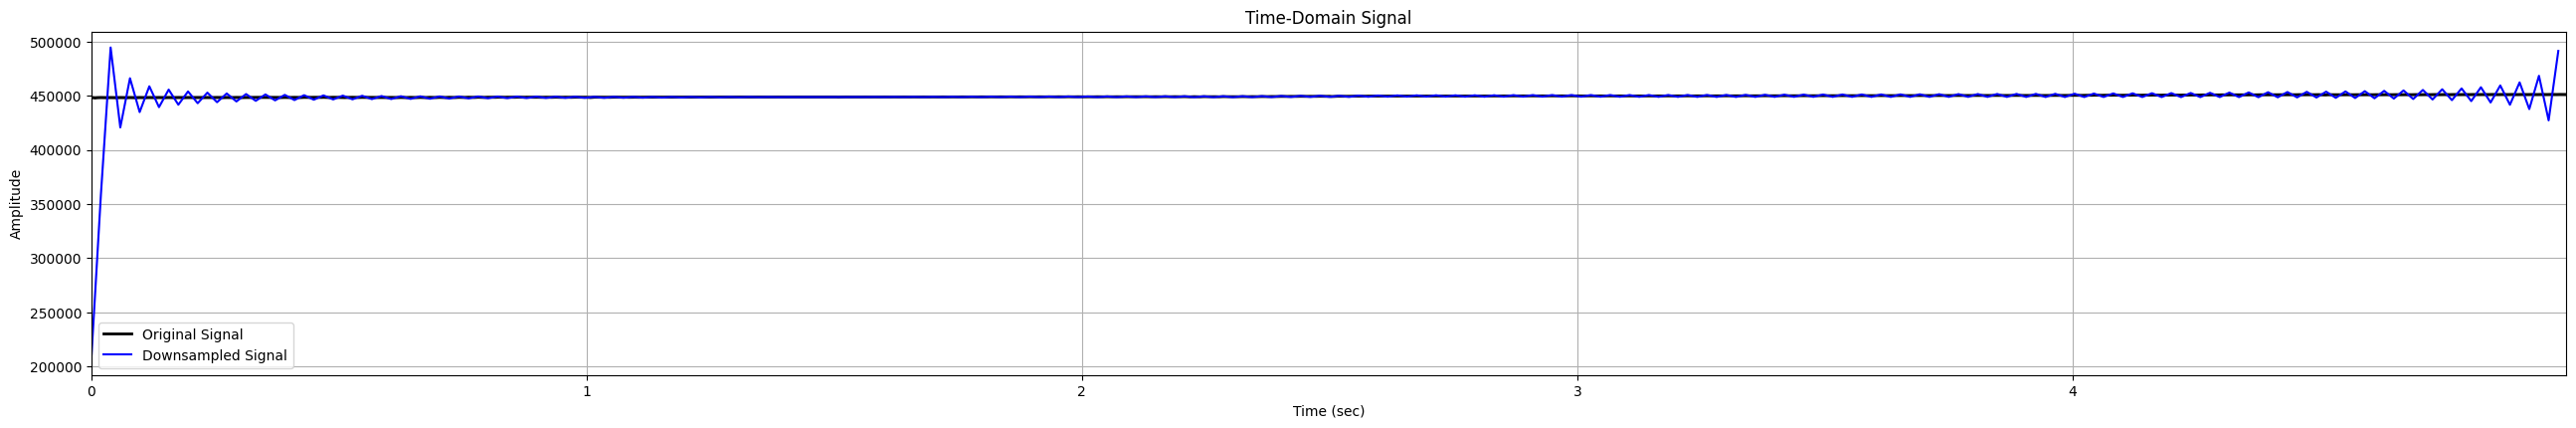

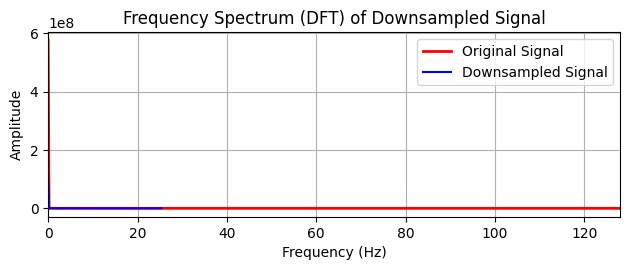

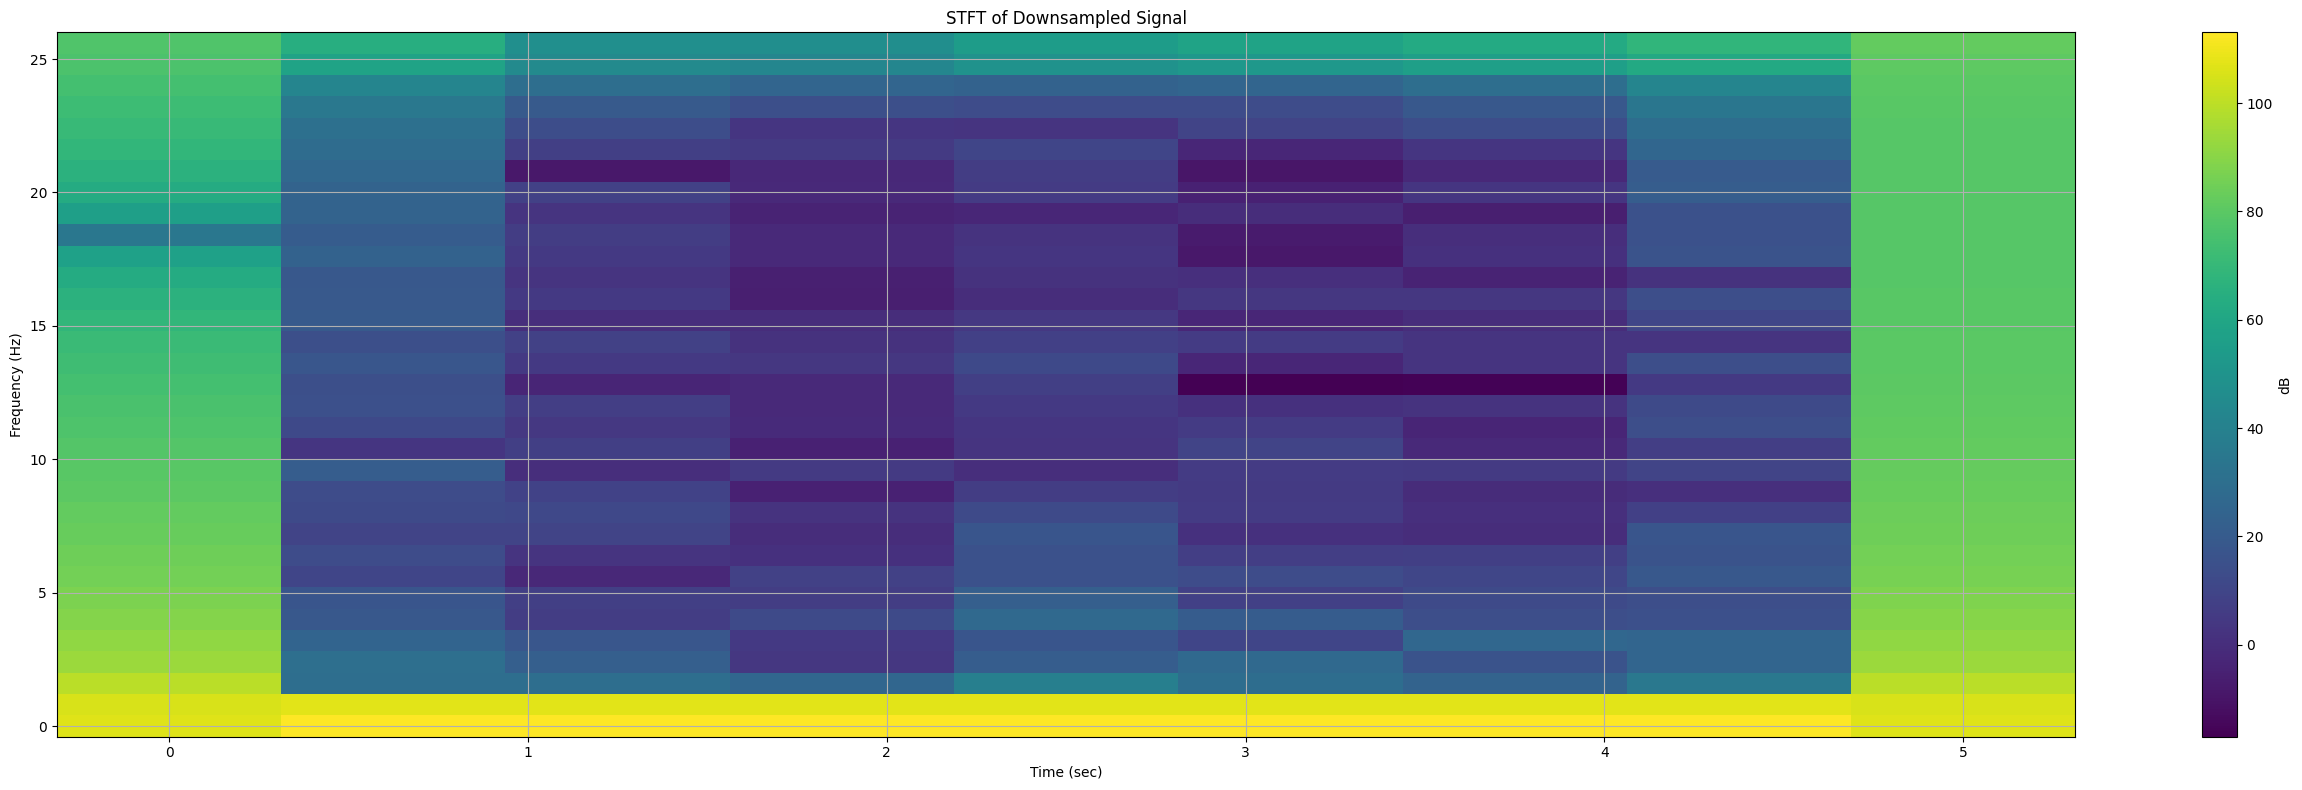

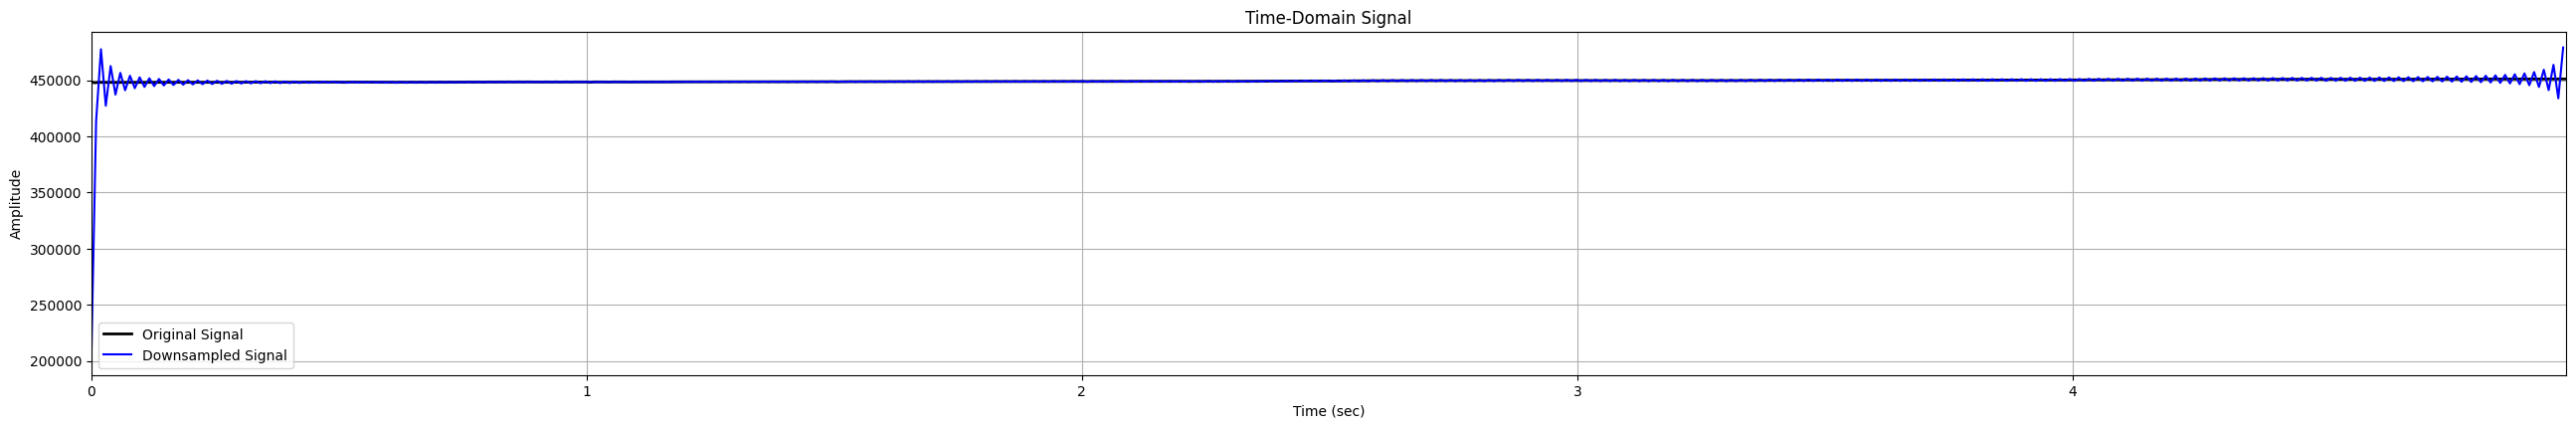

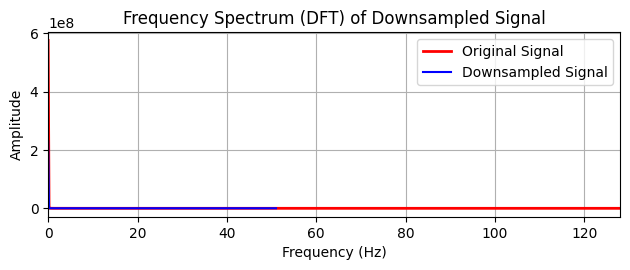

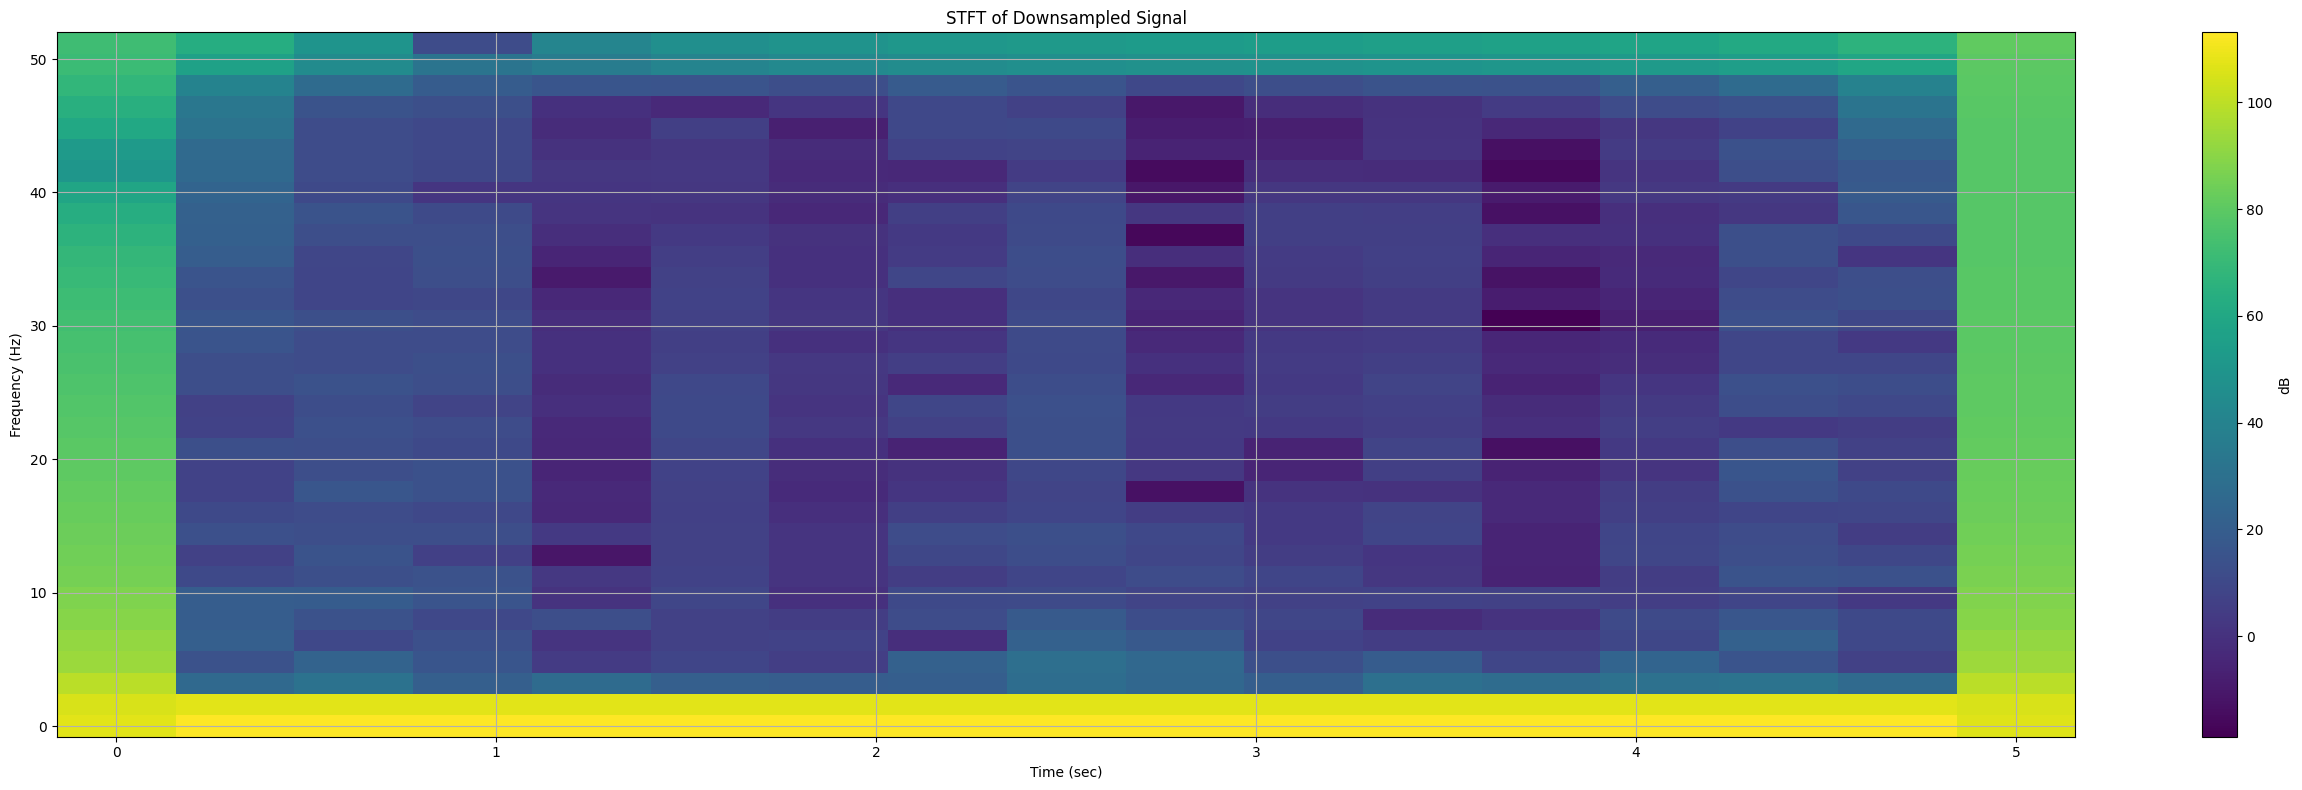

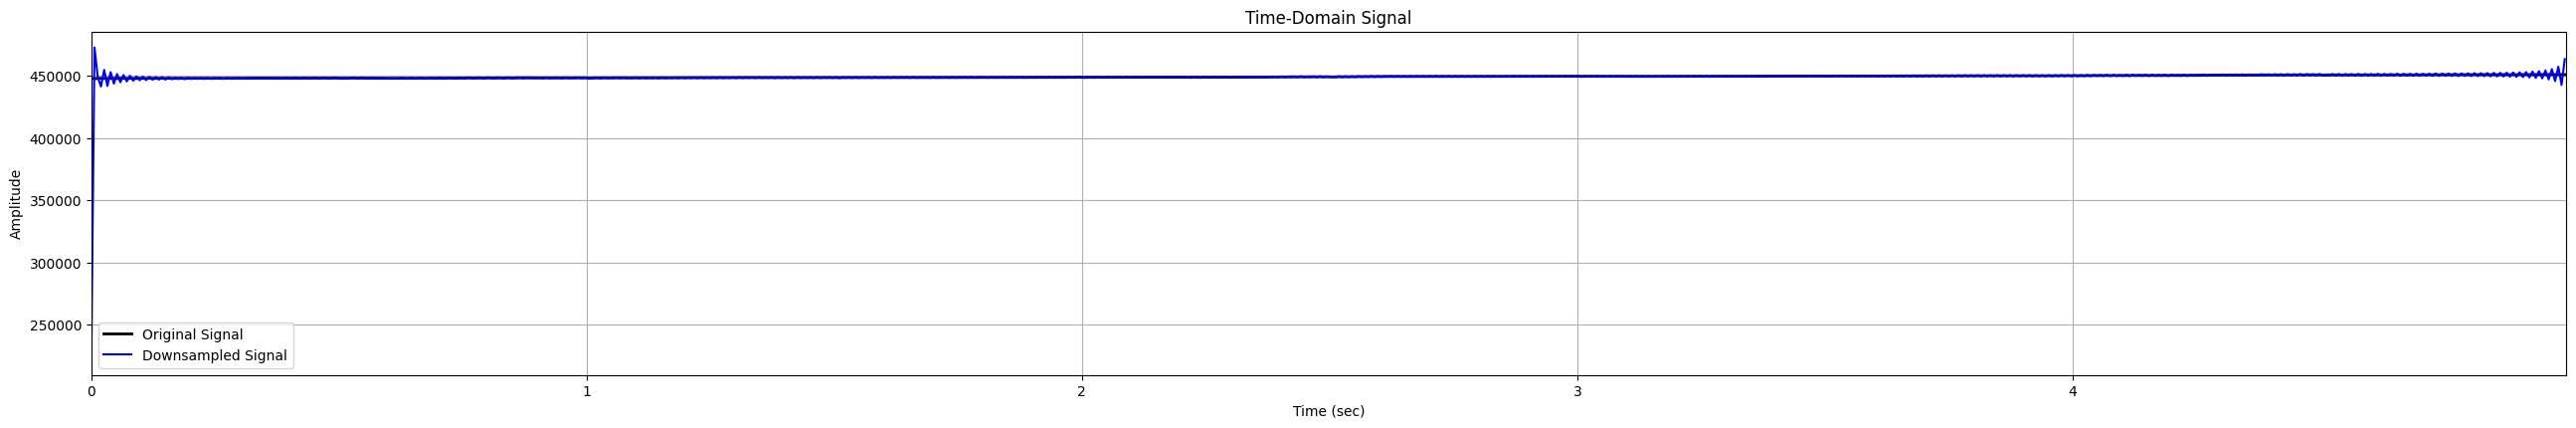

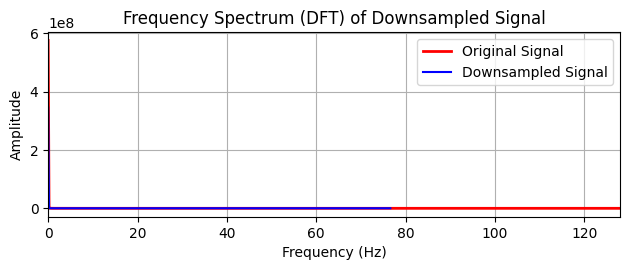

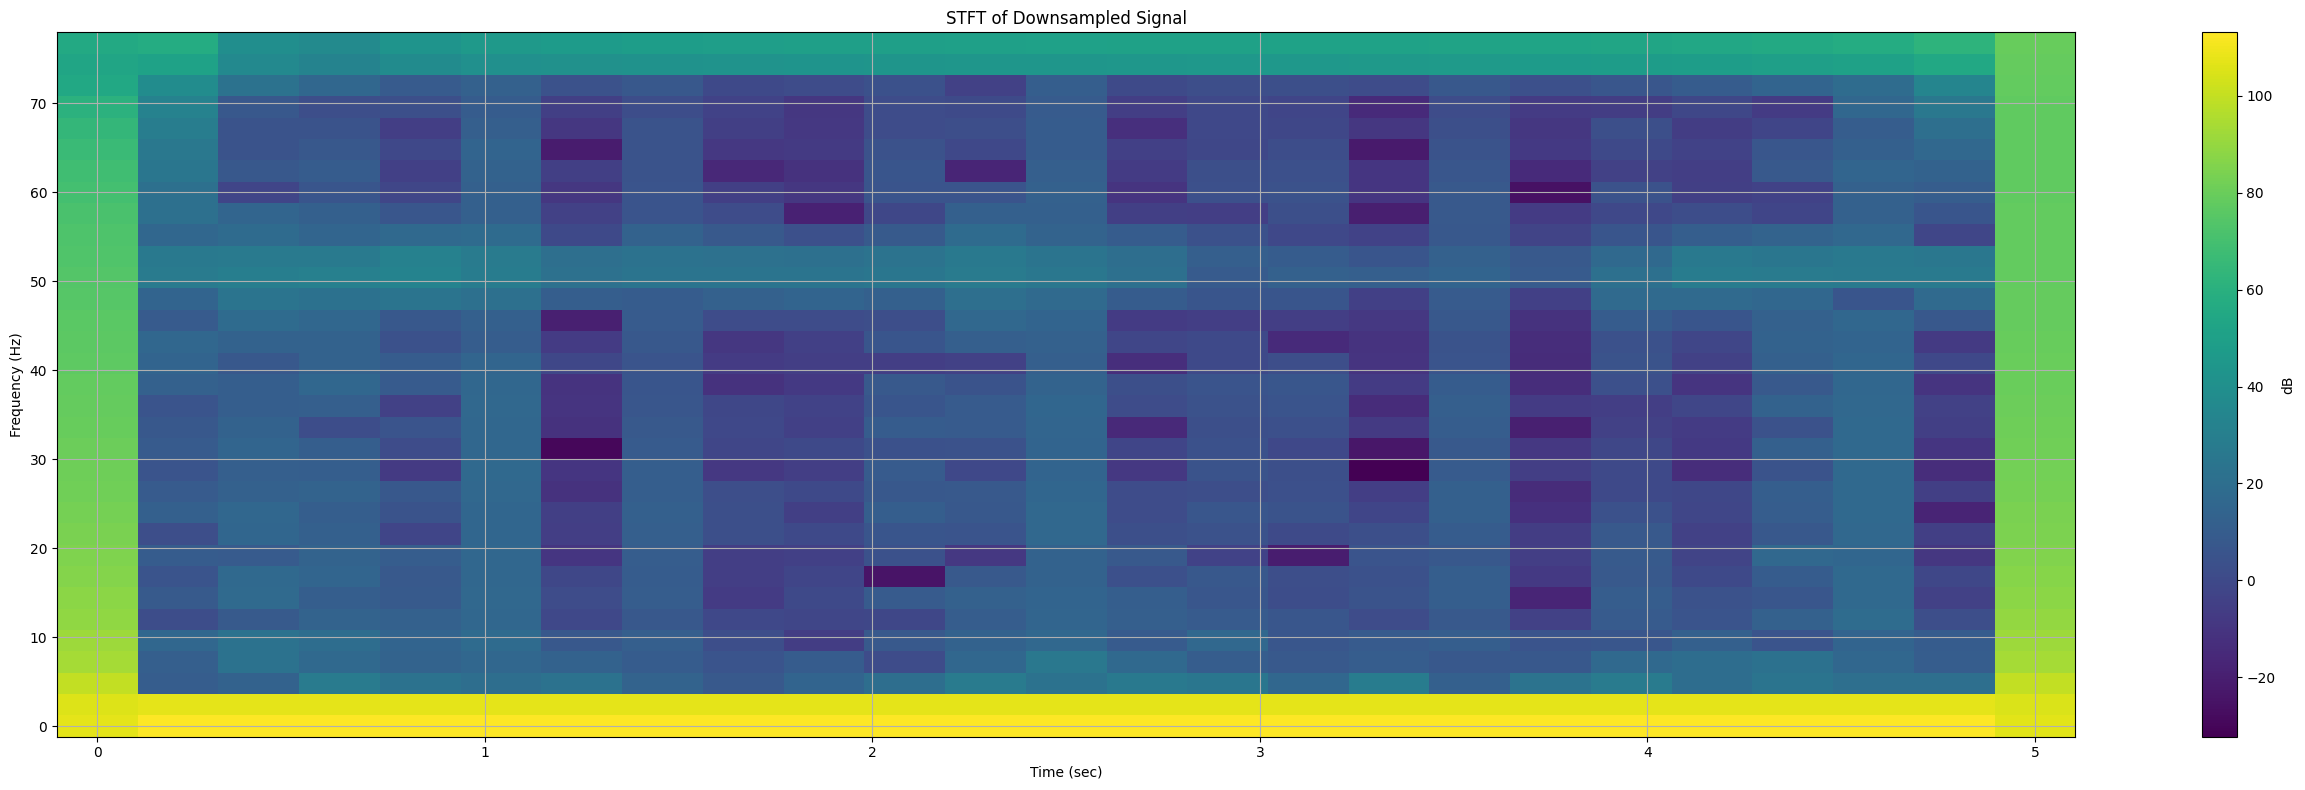

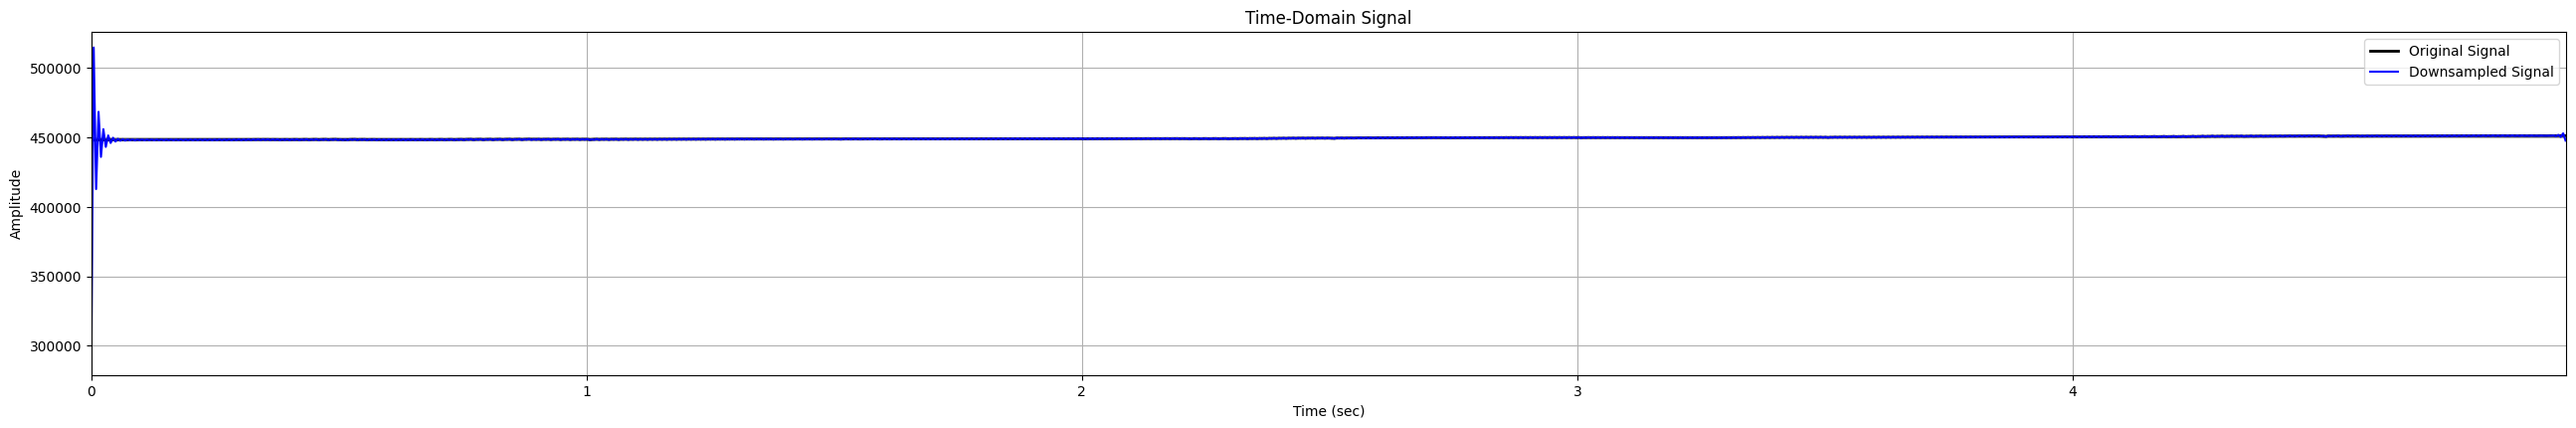

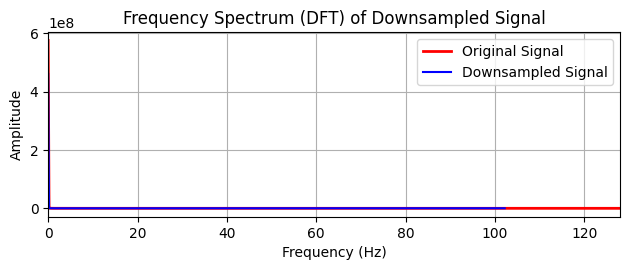

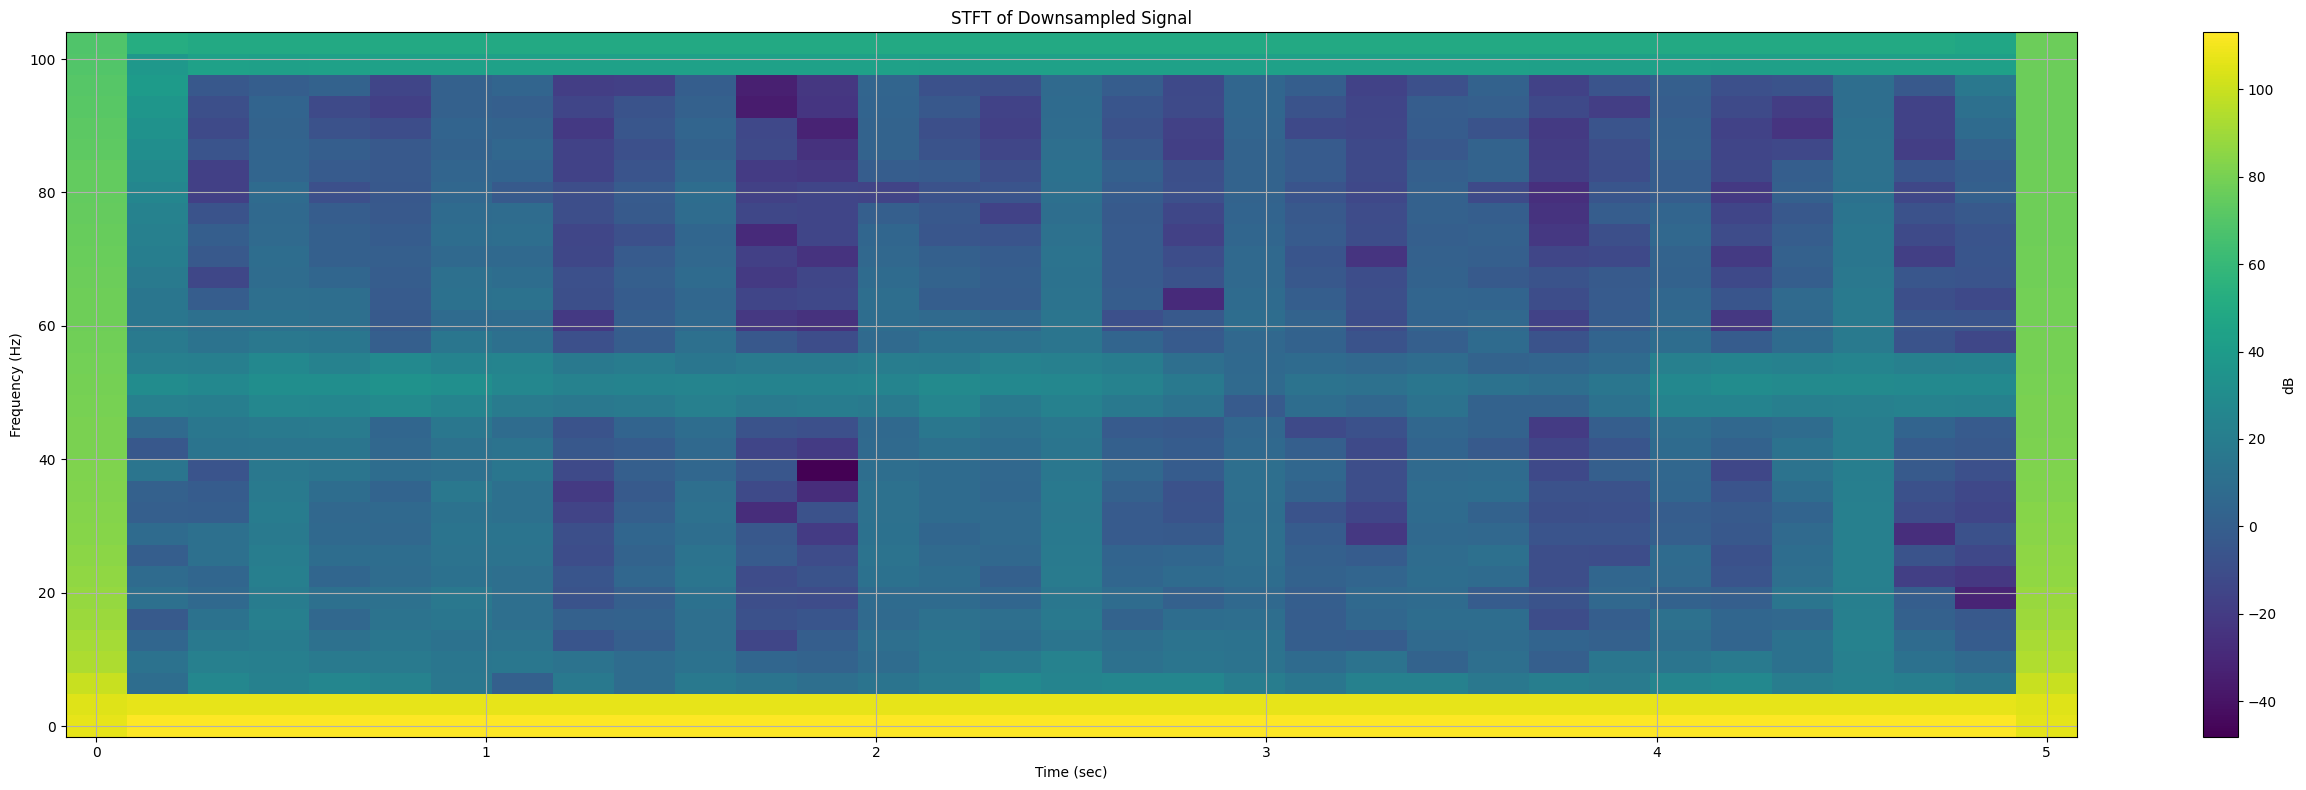

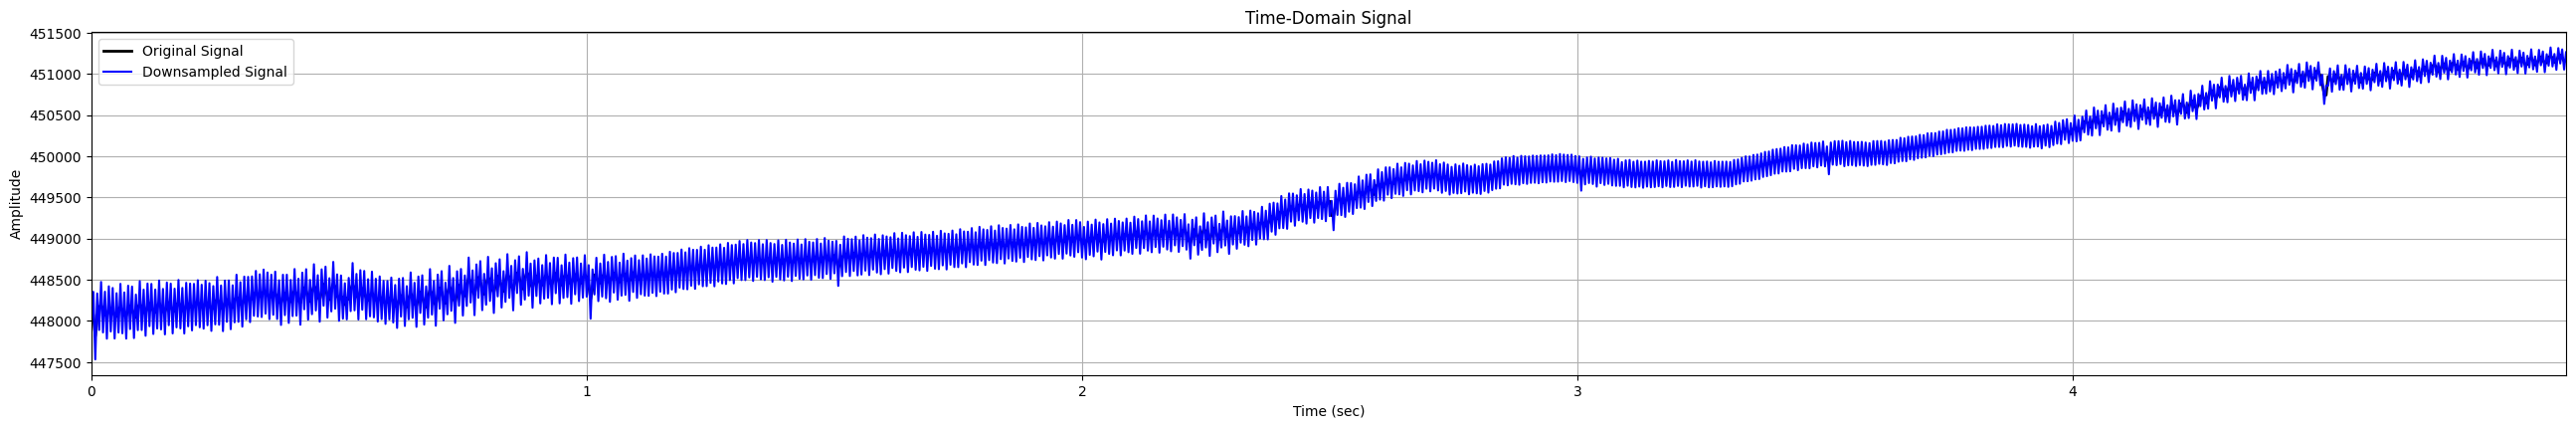

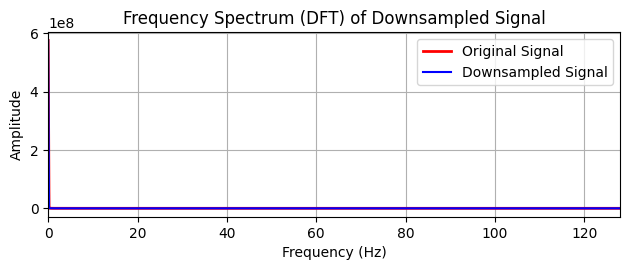

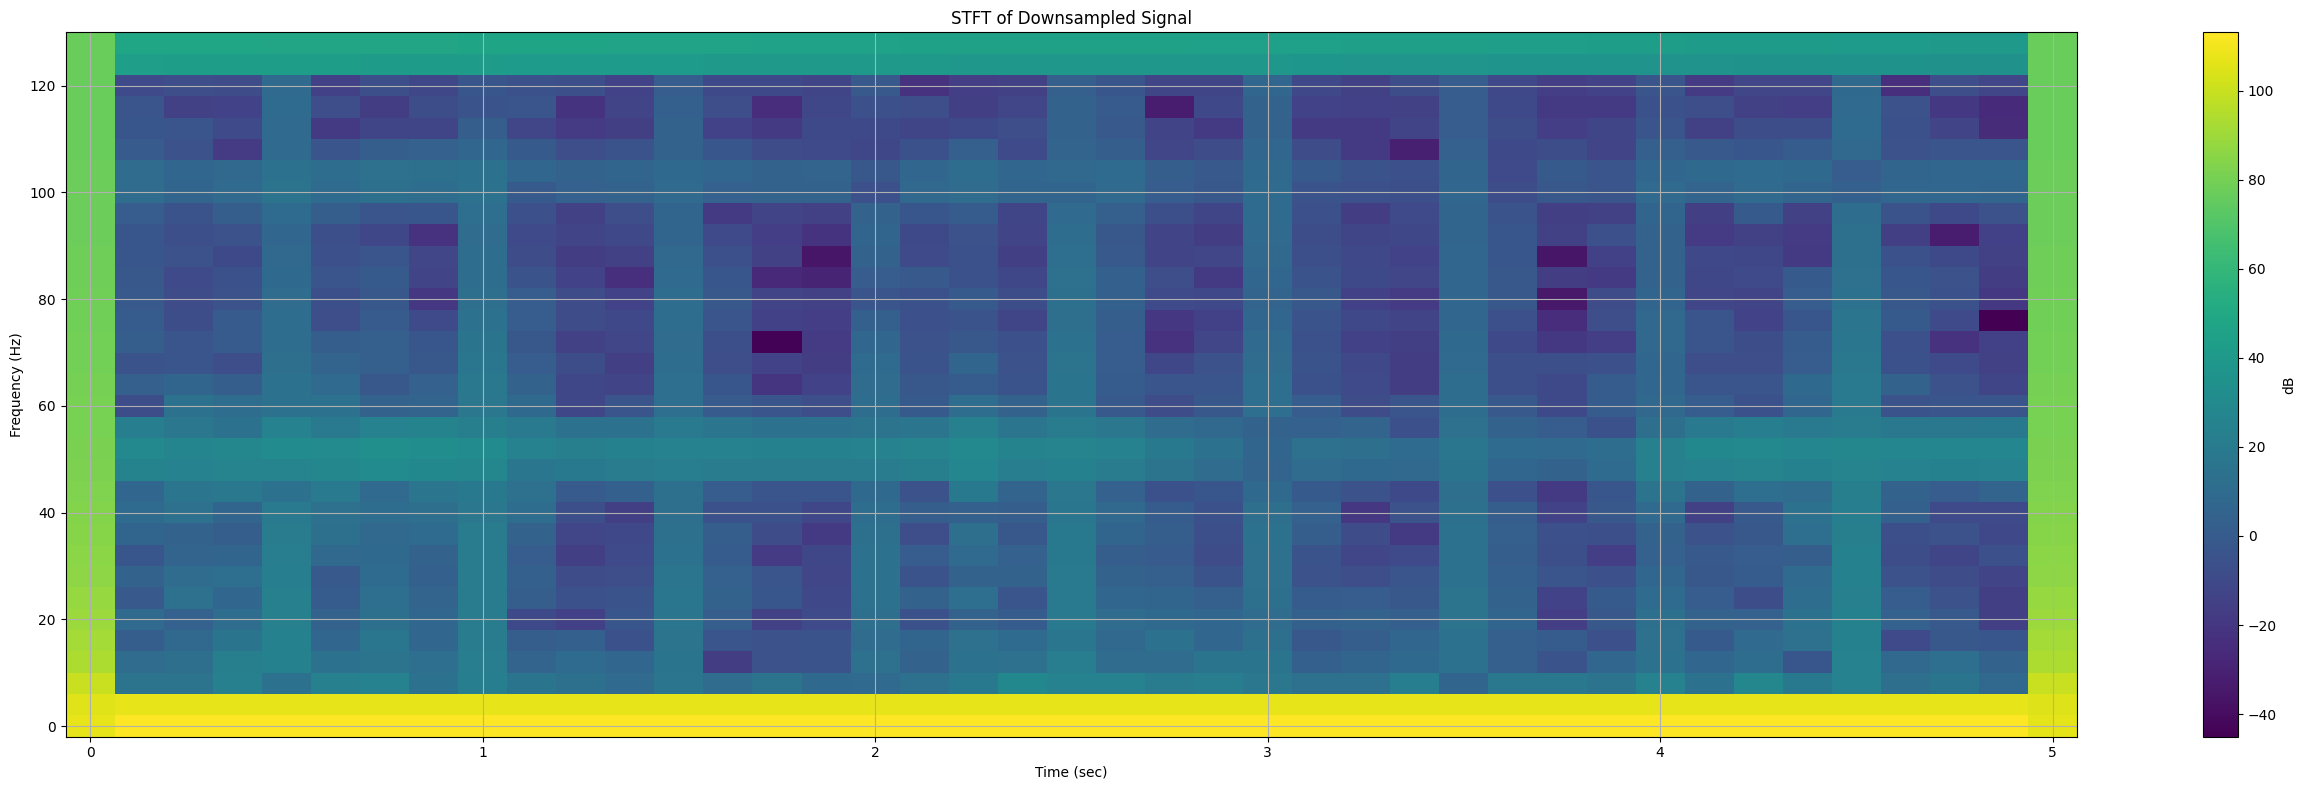

In [8]:
#%% Question 2
# part a
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import stft, butter, lfilter, resample

# Assuming signal0 is already loaded from a .mat file
# signal0 = loadmat('filename.mat')['signal0'].flatten()

# Plot the time-domain signal
fs = 256  # Hz
n_samples = len(signal0)
t = np.arange(0, n_samples) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, signal0, 'k')
plt.title("Time-Domain Signal")
# A time-domain signal represents a signal's variation over time.
# It is essentially a function that describes how the signal changes at every instant of time.
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()

# Plot the frequency spectrum (DFT)
# The frequency spectrum of a signal, often obtained through a process called the Discrete Fourier Transform (DFT),
# is a representation of the signal in the frequency domain. It shows how the signal's energy or power is distributed 
# across different frequencies. This is particularly useful for understanding the frequency content of a signal, which 
# is important in various fields like signal processing, telecommunications, and audio engineering.
dft = fft(signal0)## this stores the discreate fpourier tranform usiong fft(fast fouriour transformation)
n = len(signal0)
freq = np.fft.fftfreq(n, 1/fs)
# freq: This variable stores the array of frequency bins corresponding to the DFT.
# np.fft.fftfreq(n, 1/fs): This function generates an array of frequency values
# for each DFT bin. The second argument, 1/fs, is the sample spacing (inverse of the sampling
# frequency), which is used to scale the frequency values correctly.
positive_freq_indices = np.where(freq >= 0)
# In the DFT output, frequencies are symmetrical around zero,
# so we typically only plot the positive frequencies.
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r')
# np.abs(dft[positive_freq_indices]): The y-axis values, which are the magnitudes of the DFT coefficients.
# The np.abs() function computes the magnitude of the complex DFT values
plt.title("Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()

# Plot the STFT
# The STFT is an extension of the Fourier Transform (FT) that is used to analyze non-stationary signals,
# whose frequency content changes over time. It provides a way to observe how the spectral content of a signal
# evolves over time by breaking the signal into small overlapping segments, 
f, t_stft, Zxx = stft(signal0, fs=fs, nperseg=64)
  # You can adjust nperseg for desired time and frequency resolution
#stft(signal0, fs=fs, nperseg=64): This function computes the Short-Time Fourier Transform (STFT) of the signal signal0.

# signal0: The input signal.
# fs=fs: The sampling frequency, which is 256 Hz in this case.
# nperseg=64: The number of samples per segment for the STFT. This determines the window size for the STFT.
# f: Array of sample frequencies.

# t_stft: Array of segment times.

# Zxx: STFT of signal0. It is a 2D array where each element represents the complex amplitude of a particular frequency at a particular time.


plt.figure(figsize=(10, 4))
plt.pcolormesh(t_stft, f, 20 * np.log10(np.abs(Zxx)))
# plt.pcolormesh(t_stft, f, 20 * np.log10(np.abs(Zxx))): This function creates a pseudocolor plot (a 2D image plot) of the STFT magnitude.
# t_stft: The x-axis values representing time.
# f: The y-axis values representing frequency.
# 20 * np.log10(np.abs(Zxx)): The magnitude of the STFT in decibels (dB). The np.abs(Zxx) computes the magnitude of the complex STFT values,
# and 20 * np.log10(...) converts it to decibels for better visualization of a wide range of magnitudes.
plt.title("Short-Time Fourier Transform (STFT)")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.grid(True)
plt.tight_layout()
plt.show()

# Part b
M = [1, 2, 4, 6, 8, 10]
desireds_fs = np.array(M) * fs / 10

for desired_fs in desireds_fs:
    # Step 1: Apply a low-pass filter
    nyquist = 0.5 * fs
    # It represents the maximum frequency that can be accurately represented in a digital signal.
    low_cutoff = 0.4999 * desired_fs
    #The low cutoff frequency is determined based on the desired sampling frequency (desired_fs). The value 0.4999 is used to ensure that the cutoff frequency is slightly below the Nyquist frequency.
    #This is a common practice to prevent aliasing and ensure accurate filtering.
    b, a = butter(3, low_cutoff / nyquist, btype='low')
    # butter(3, low_cutoff / nyquist, btype='low'): This function call creates a Butterworth filter of order 3 (third-order filter) with a cutoff frequency determined by low_cutoff / nyquist
    # . The btype='low' parameter specifies that it's a low-pass filter.




    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal0)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)))
    # int(len(filtered_signal) * (desired_fs / fs)): Calculates the new length
    # of the downsampled signal based on the desired and original sampling frequencies.


    # Adjust the time array for the downsampled signal
    t_downsampled = np.arange(0, len(downsampled_signal)) / desired_fs

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal0, 'k', label="Original Signal", lw=2)
    plt.plot(t_downsampled, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of downsampled signal
    plt.subplot(2, 1, 2)
    dft = fft(signal0)
    freq = np.fft.fftfreq(len(signal0), 1 / fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Original Signal", lw=2)
    dft_ds = fft(downsampled_signal)
    freq_ds = np.fft.fftfreq(len(downsampled_signal), 1 / desired_fs)
    positive_freq_indices_ds = np.where(freq_ds >= 0)
    plt.plot(freq_ds[positive_freq_indices_ds], np.abs(dft_ds[positive_freq_indices_ds]), c='b', label="Downsampled Signal")
    plt.title("Frequency Spectrum (DFT) of Downsampled Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xlim(0, fs / 2)
    plt.show()

    # STFT of downsampled signal
    f_ds, t_stft_ds, Zxx_ds = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_stft_ds, f_ds, 20 * np.log10(np.abs(Zxx_ds)))
    plt.title("STFT of Downsampled Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#     Loop through each desired sampling frequency:
# Step 1: Low-Pass Filter
# Design a low-pass filter to avoid aliasing.
# Apply the filter to the signal.
# Step 2: Downsample the Signal.
# Resample the filtered signal to the desired sampling frequency.
# Adjust the time vector for the downsampled signal.
# Step 3: Plotting
# Plot the original and downsampled signals in the time domain.
# Plot the frequency spectrum (DFT) of both the original and downsampled signals.
# Plot the STFT of the downsampled signal.




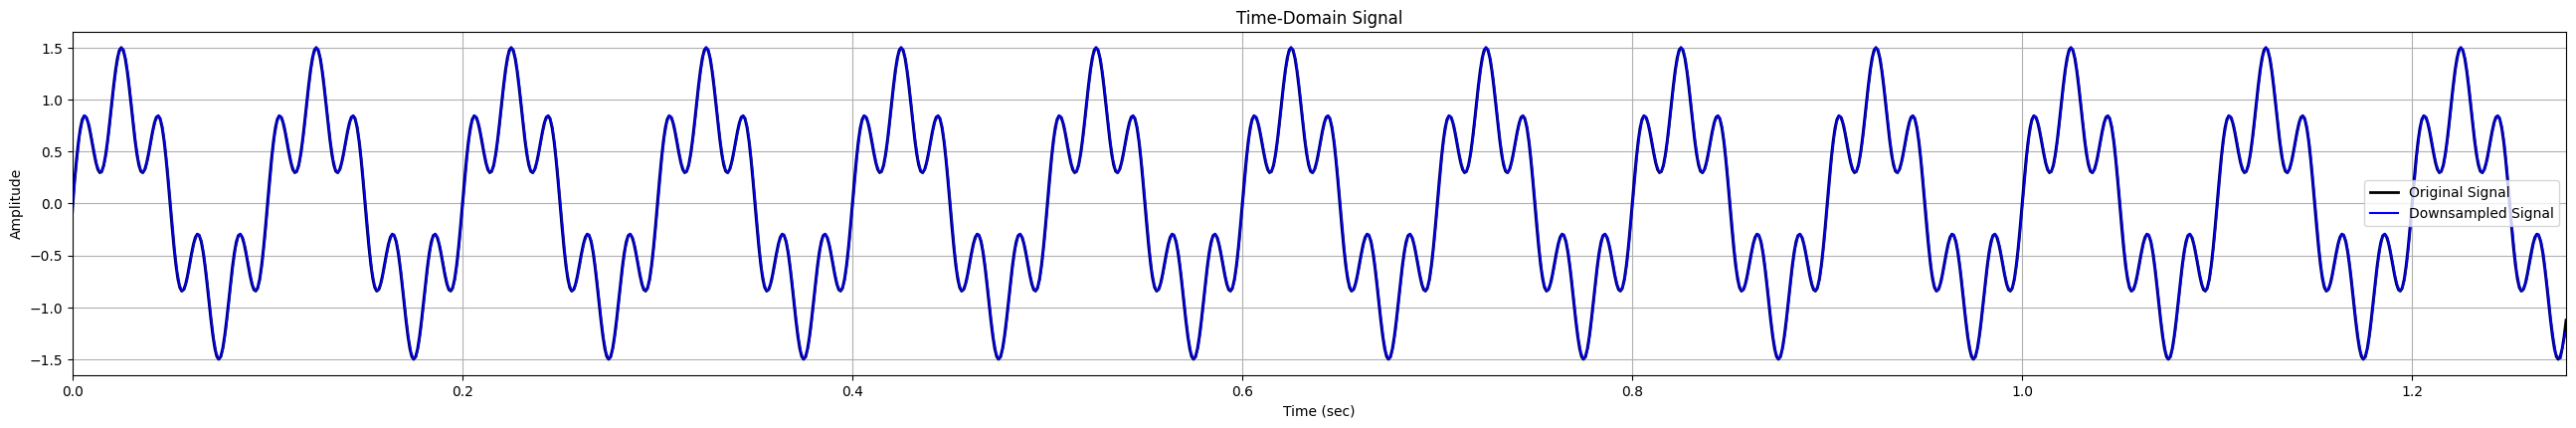

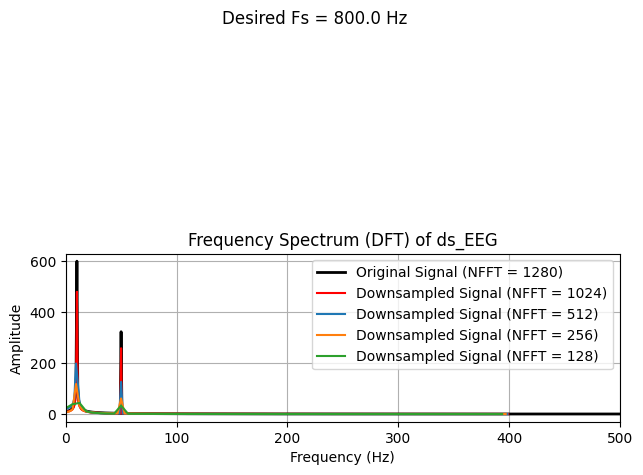

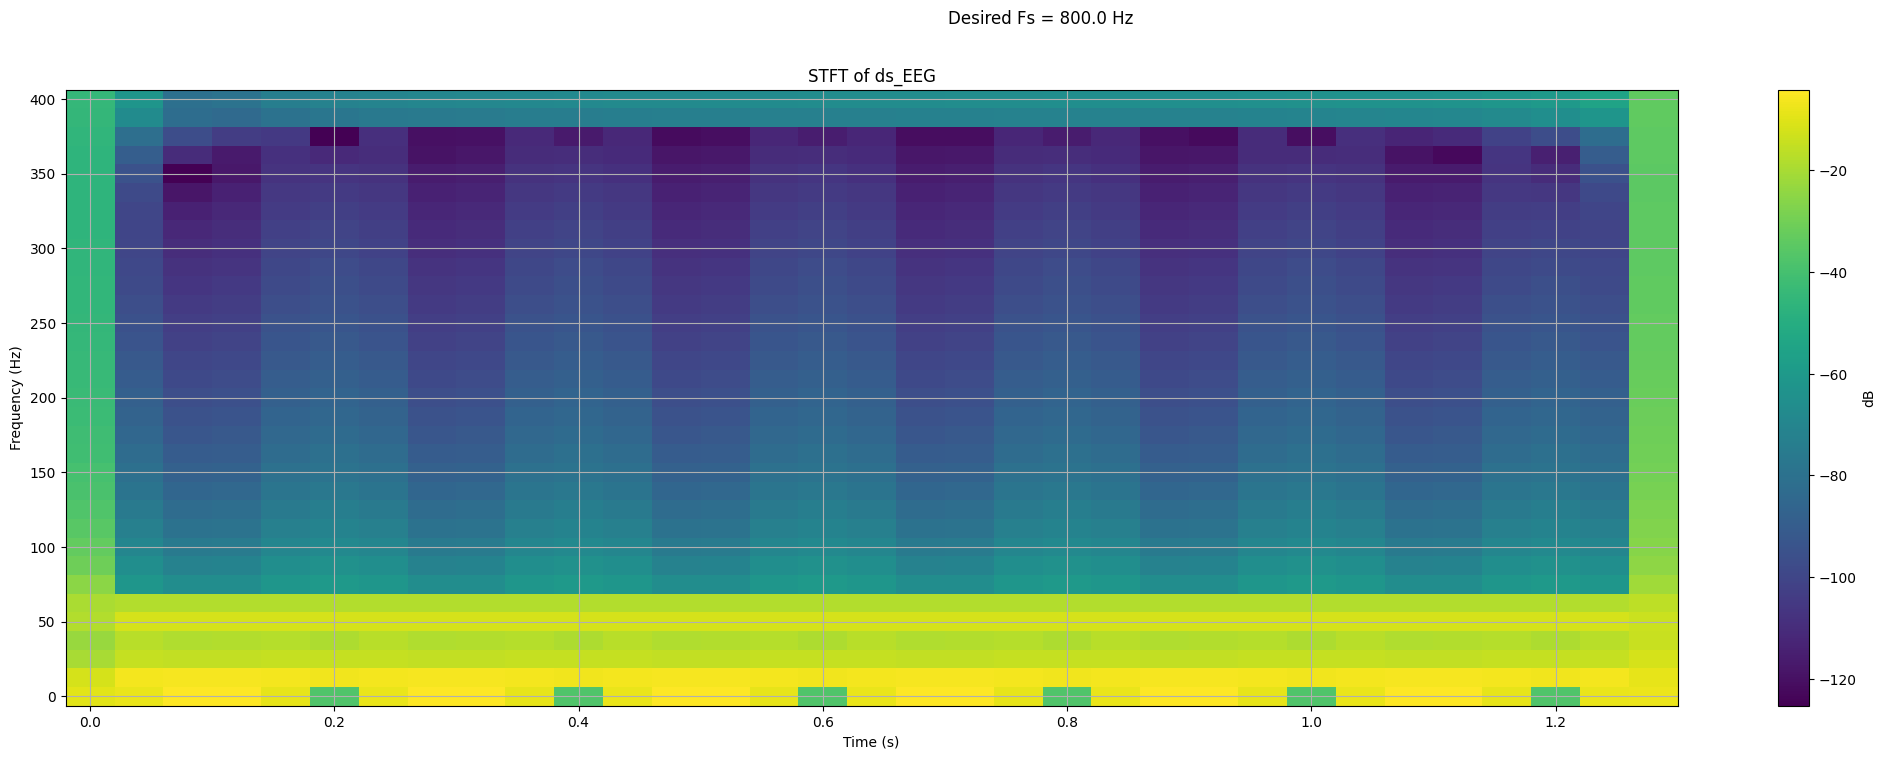

In [11]:
##B

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, resample, stft
from scipy.fft import fft

# Define the original signal (example signal)
fs = 1000  # Original sampling frequency
t = np.arange(0, 1280) / fs  # Define the time array matching the length of signal0
signal0 = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Example signal

M = [8]  # factor downsample
desireds_fs = np.array(M) * fs / 10

for desired_fs in desireds_fs:
    # Step 1: Apply a low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal0)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)))

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal0, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)

    dft = fft(signal0)
    freq = np.fft.fftfreq(len(signal0), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal0)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0 // 2, NFFT0 // 4, NFFT0 // 8]

    for NFFT in NFFTs:
        dft_ds_EEG = fft(downsampled_signal, NFFT)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))

    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs / 2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()



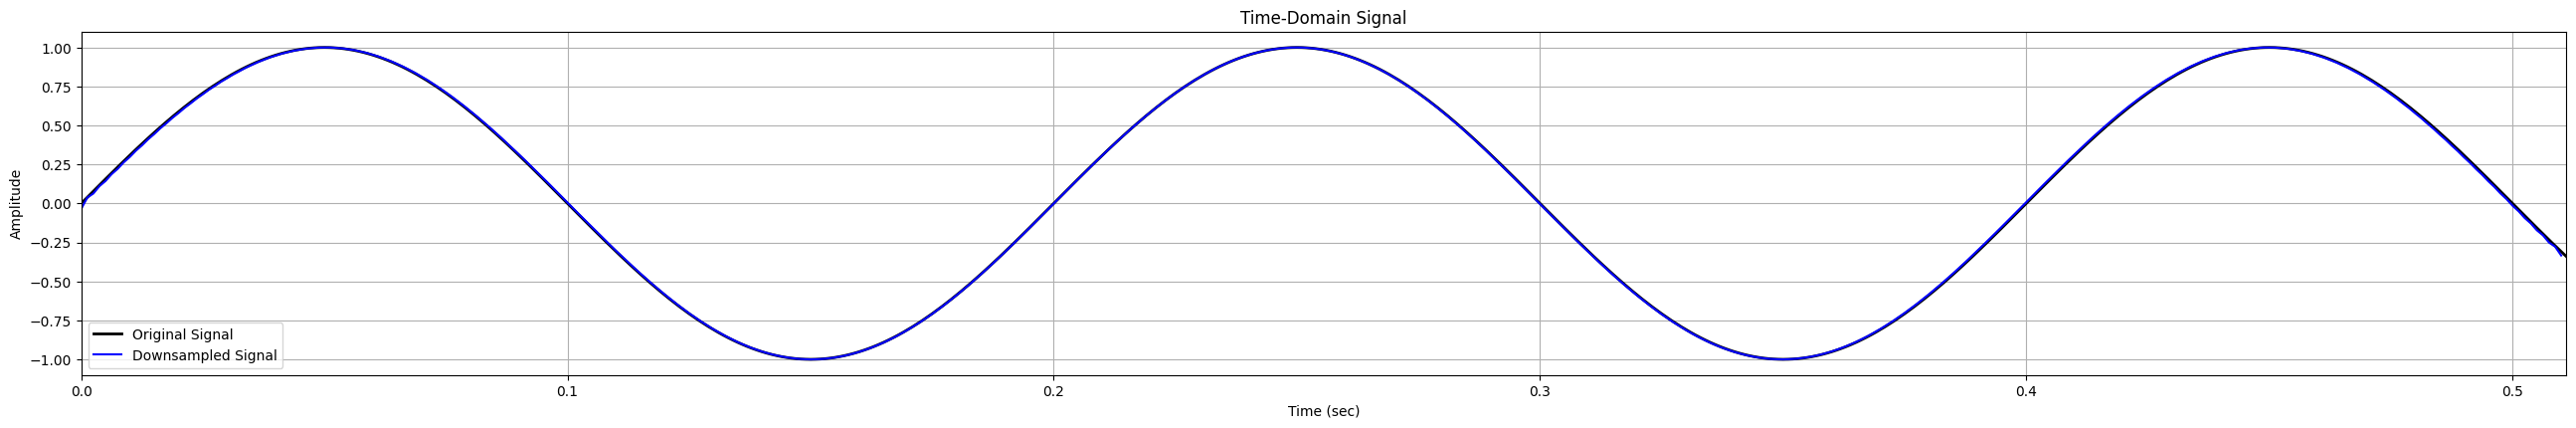

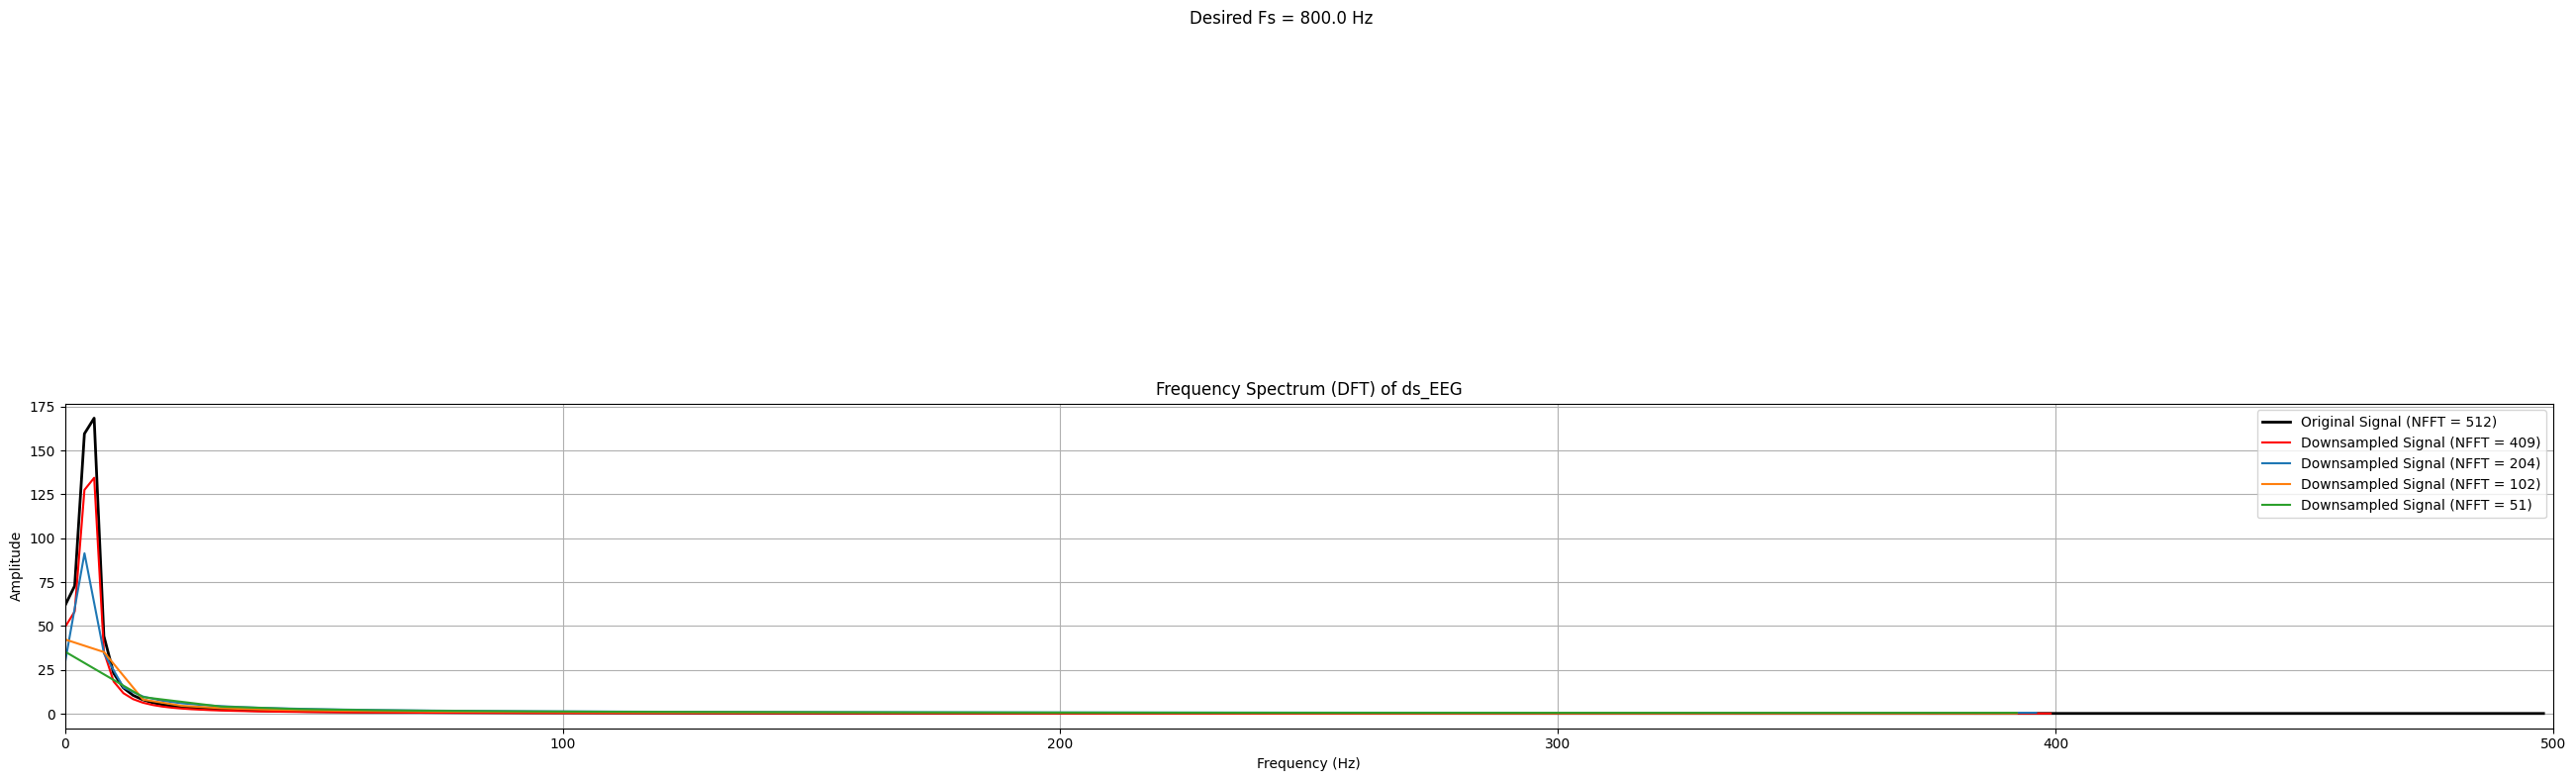

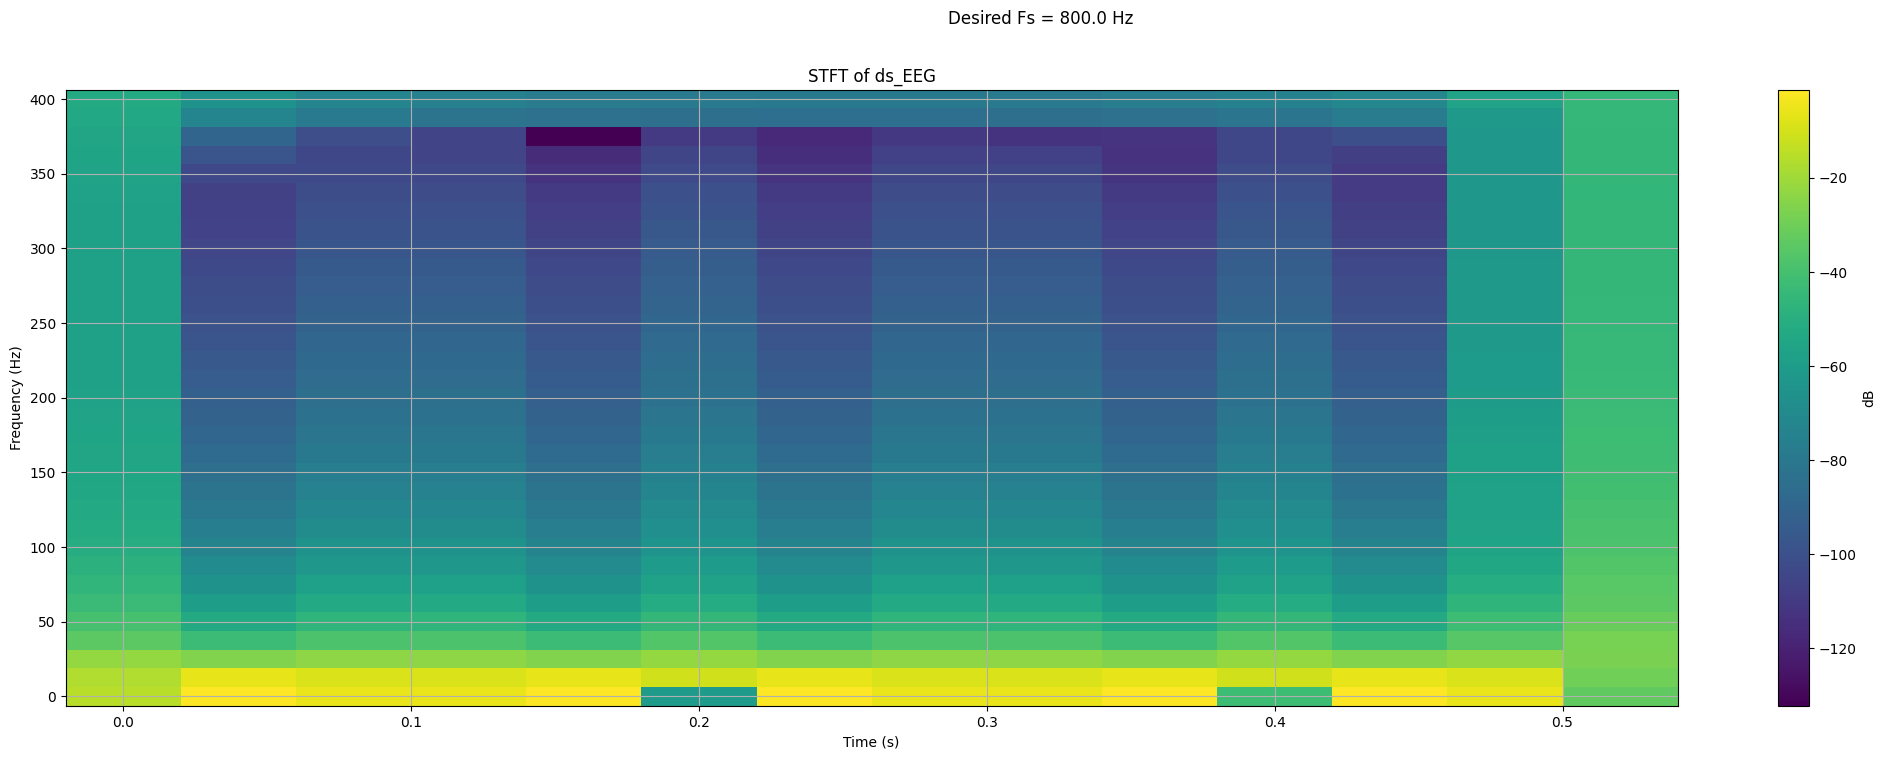

In [13]:
##PART C

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, resample, stft
from scipy.fft import fft

# Example data and parameters
fs = 1000  # Original sampling frequency
signal0 = np.sin(2 * np.pi * 5 * np.arange(0, 512) / fs)  # Original signal
# A synthetic signal composed of two sine waves, one at 10 Hz and another at 50 Hz.

M = [8]  # Factor downsample
desireds_fs = np.array(M) * fs / 10

for desired_fs in desireds_fs:
    # Define the original time array
    t = np.arange(0, len(signal0)) / fs

    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal0)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)))

    # Create a time array for the downsampled signal
    t_downsampled = np.arange(0, len(downsampled_signal)) / desired_fs

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))

    # Plot the original signal
    plt.subplot(2, 1, 1)
    plt.plot(t, signal0, 'k', label="Original Signal", lw=2)

    # Plot the downsampled signal
    plt.plot(t_downsampled, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of ds_EEG
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 2)

    dft = fft(signal0)
    freq = np.fft.fftfreq(len(signal0), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal0)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0 // 2, NFFT0 // 4, NFFT0 // 8]
#     NFFT0: Calculates the length of the downsampled signal, which is used as the initial value for the NFFT parameter.
# NFFTs: Creates a list of NFFT values, each being half, one-fourth, and one-eighth of the length of the downsampled signal.
#  These values will be used for different resolutions in the Fourier transform.

    for NFFT in NFFTs:
        dft_ds_EEG = fft(downsampled_signal, NFFT)
        # dft_ds_EEG: Computes the Discrete Fourier Transform (DFT) of the downsampled signal using the specified NFFT value.
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))

    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()
    # The visualization helps analyze how the frequency content
    # of the downsampled signal varies depending on the NFFT value used in the Fourier transform.
    #  the code's purpose is to provide a comprehensive analysis of the frequency content of a downsampled
    #  signal at different resolutions, allowing for validation, optimization, and understanding of the downsampling process's impact on the signal's frequency domain characteristics

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()


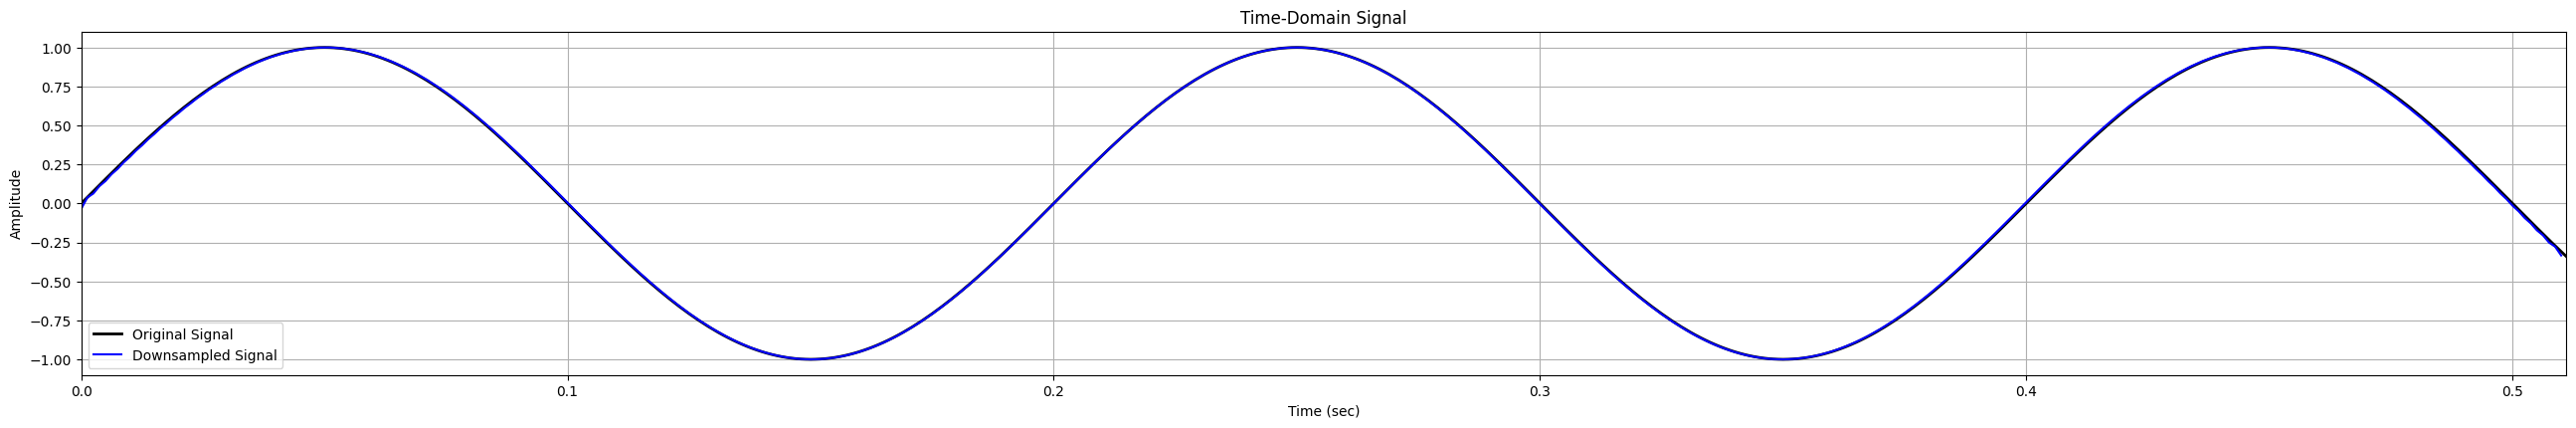

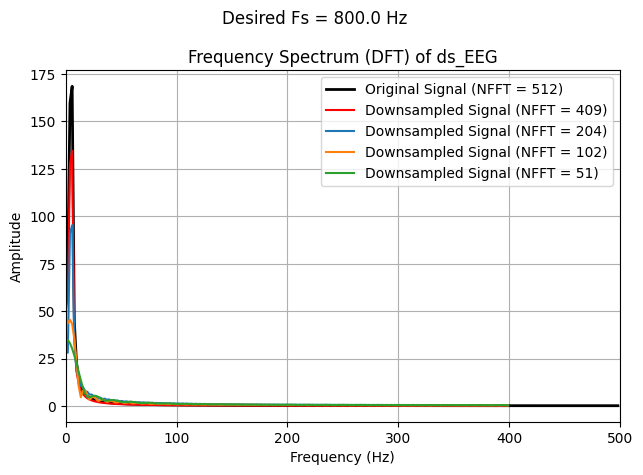

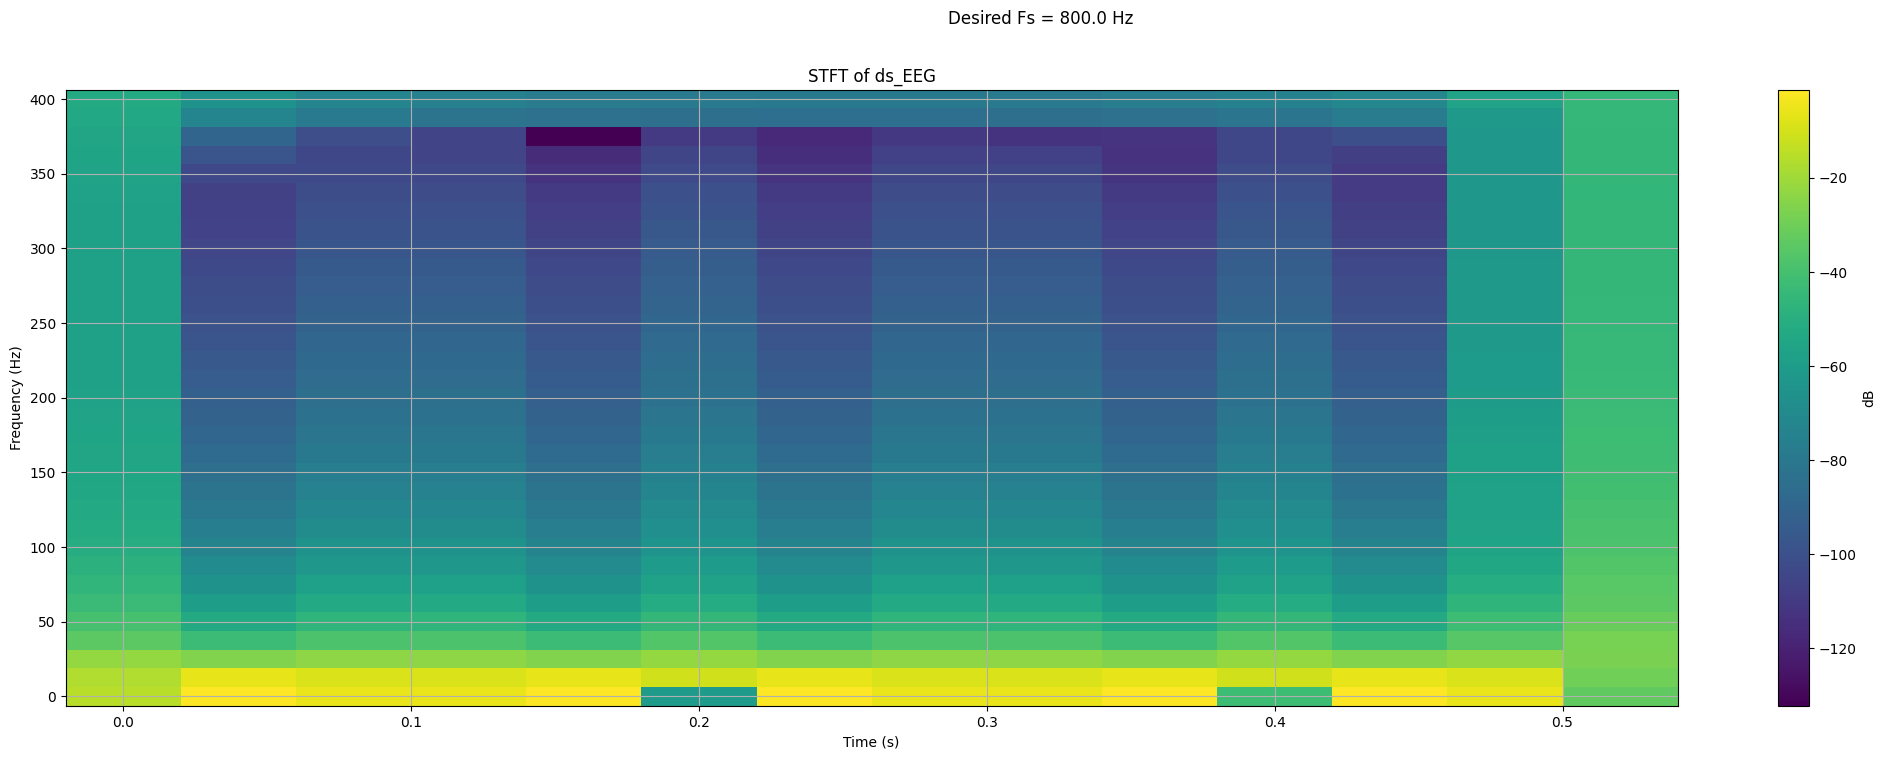

In [14]:
##PART D
M = [8] # factor downsample
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    t = np.arange(0, 512) / fs

    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    filtered_signal = lfilter(b, a, signal0)

    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal0, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure()
    dft = fft(signal0)
    freq = np.fft.fftfreq(len(signal0), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal0)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]

    for NFFT in NFFTs:##NFFT= "Number of Frequency Bins in FFT."
        EEG_ds2 = np.zeros(NFFT0)
        EEG_ds2[:NFFT] = downsampled_signal[:NFFT]
        dft_ds_EEG = fft(EEG_ds2, NFFT0)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))
# Perform additional DFTs with varying NFFT sizes and plot their spectra
# NFFT is used to control the frequency resolution when computing the Discrete Fourier Transform (DFT) of the downsampled signal. By varying NFFT,
# you can observe how the frequency spectrum representation changes, affecting the ability to resolve different frequency components in the signal.
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()

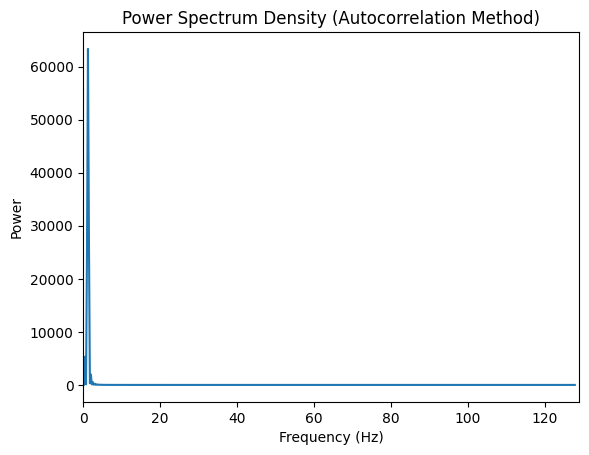

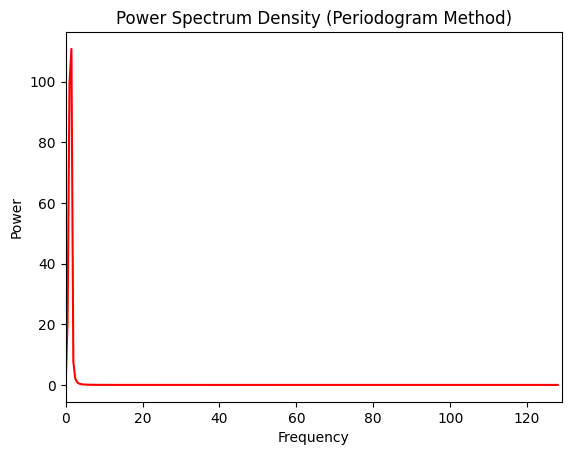

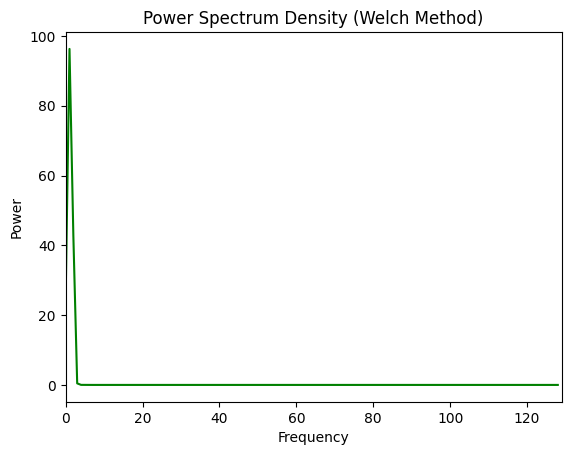

In [17]:
#%% Question 3
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch
from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import stft

# Load the signal from the .mat file
fs = 256 #Hz
t = np.arange(0, 512) / fs

# a) Autocorrelation method
autocorr = np.correlate(signal0, signal0, mode='full')
# Calculates the autocorrelation of the signal0 with itself. Autocorrelation measures
# the similarity between a signal and a delayed version of itself at different time lags.
# The result autocorr contains the autocorrelation values for different lags.
power_autocorr = np.abs(np.fft.fft(autocorr))
# Computes the power spectrum using the Fast Fourier Transform (FFT) of the autocorrelation.
# Taking the absolute value (np.abs) ensures we get the magnitude spectrum.
freqs = np.fft.fftfreq(len(power_autocorr), 1/fs)
plt.figure()
plt.plot(freqs[:512], power_autocorr[:512])##limit it to first 512 bins
plt.title('Power Spectrum Density (Autocorrelation Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([0, 129])

# b) Periodogram method
freqs, power_periodogram = periodogram(signal0)
# Computes the periodogram of the input signal signal0. The periodogram is a frequency-domain representation
# of the signal's power spectral density (PSD), showing how the power of the signal is distributed across different frequencies.
plt.figure()
plt.plot(freqs*fs, power_periodogram, 'r')
plt.title('Power Spectrum Density (Periodogram Method)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 129])

# c) Welch method
freqs, power_welch = welch(signal0)
#Computes the Welch periodogram of the input signal signal0. The Welch method divides the signal into overlapping '
#segments, computes a periodogram for each segment,
#and then averages these periodograms to obtain a smoother estimate of the power spectral density (PSD).
# freqs contains the frequency values corresponding to the power spectrum estimated using Welch's method.
# power_welch contains the power values of the signal at each frequency bin, computed using Welch's method.

plt.figure()
plt.plot(freqs*fs, power_welch, 'g')
plt.title('Power Spectrum Density (Welch Method)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 129])
plt.show()